# Cointegration Analysis of Hommali Rice

In [27]:
source('utils.R')

In [29]:
p_rice = readRDS('../data/price_rice_filled.rds')
p_rice_xts = ts_xts(p_rice)
names(p_rice_xts)

[1] "RHFG_0"       "RHFG_NR"      "RHFG_BR"      "RHFG_SI"      "RHFG_SU"     
 [6] "RHFG_UR"      "RWFG_0"       "RWFG_NS"      "RWFG_KP"      "RWFG_PC"     
[11] "RWFG_PS"      "RWFG_SH"      "RGFG_0"       "RGFG_UN"      "RGFG_SN"     
[16] "RGFG_KK"      "RGFG_MS"      "RGFG_KL"      "RHWS"         "RWWS"        
[21] "RGWS"         "RHXB"         "RWXB"         "RGXB"         "d_foodcrisis"
[26] "d_pledge"

In [36]:
RHXB = p_rice_xts['2007/', 'RHXB'] %>% ts_ts()
RHWS = p_rice_xts['2007/', 'RHWS'] %>% ts_ts()
RHFG = p_rice_xts['2007/', 'RHFG_0'] %>% ts_ts()
 
RWXB = p_rice_xts['2007/', 'RWXB'] %>% ts_ts()
RWWS = p_rice_xts['2007/', 'RWWS'] %>% ts_ts()
RWFG = p_rice_xts['2007/', 'RWFG_0'] %>% ts_ts()

d_foodcrisis = p_rice_xts['2007/', 'd_foodcrisis'] %>% ts_ts()
d_pledge = p_rice_xts['2007/', 'd_pledge'] %>% ts_ts()

rbind(ur_adf(RHXB, 0), ur_adf(RHXB, 1),
      ur_adf(RHWS, 0), ur_adf(RHWS, 1),
      ur_adf(RHFG, 0), ur_adf(RHFG, 1),
      ur_adf(RWXB, 0), ur_adf(RWXB, 1),
      ur_adf(RWWS, 0), ur_adf(RWWS, 1),
      ur_adf(RWFG, 0), ur_adf(RWFG, 1)
     ) %>% print()

   variable hypo level statistic  1pct  5pct 10pct result
1      RHXB tau3    d0     -2.97 -3.99 -3.43 -3.13 Accept
2      RHXB tau2    d0     -3.03 -3.46 -2.88 -2.57 Reject
3      RHXB tau1    d0      0.20 -2.58 -1.95 -1.62 Accept
4      RHXB tau3    d1     -8.05 -3.99 -3.43 -3.13 Reject
5      RHXB tau2    d1     -8.03 -3.46 -2.88 -2.57 Reject
6      RHXB tau1    d1     -8.01 -2.58 -1.95 -1.62 Reject
7      RHWS tau3    d0     -2.73 -3.99 -3.43 -3.13 Accept
8      RHWS tau2    d0     -2.79 -3.46 -2.88 -2.57 Accept
9      RHWS tau1    d0      0.18 -2.58 -1.95 -1.62 Accept
10     RHWS tau3    d1     -8.58 -3.99 -3.43 -3.13 Reject
11     RHWS tau2    d1     -8.55 -3.46 -2.88 -2.57 Reject
12     RHWS tau1    d1     -8.53 -2.58 -1.95 -1.62 Reject
13     RHFG tau3    d0     -3.02 -3.99 -3.43 -3.13 Accept
14     RHFG tau2    d0     -3.10 -3.46 -2.88 -2.57 Reject
15     RHFG tau1    d0     -0.02 -2.58 -1.95 -1.62 Accept
16     RHFG tau3    d1     -7.83 -3.99 -3.43 -3.13 Reject
17     RHFG ta

## Plot

In [28]:
p_rice = readRDS('../data/price_rice_filled.rds')
p_rice_xts = ts_xts(p_rice)
names(p_rice_xts)

[1] "RHFG_0"       "RHFG_NR"      "RHFG_BR"      "RHFG_SI"      "RHFG_SU"     
 [6] "RHFG_UR"      "RWFG_0"       "RWFG_NS"      "RWFG_KP"      "RWFG_PC"     
[11] "RWFG_PS"      "RWFG_SH"      "RGFG_0"       "RGFG_UN"      "RGFG_SN"     
[16] "RGFG_KK"      "RGFG_MS"      "RGFG_KL"      "RHWS"         "RWWS"        
[21] "RGWS"         "RHXB"         "RWXB"         "RGXB"         "d_foodcrisis"
[26] "d_pledge"

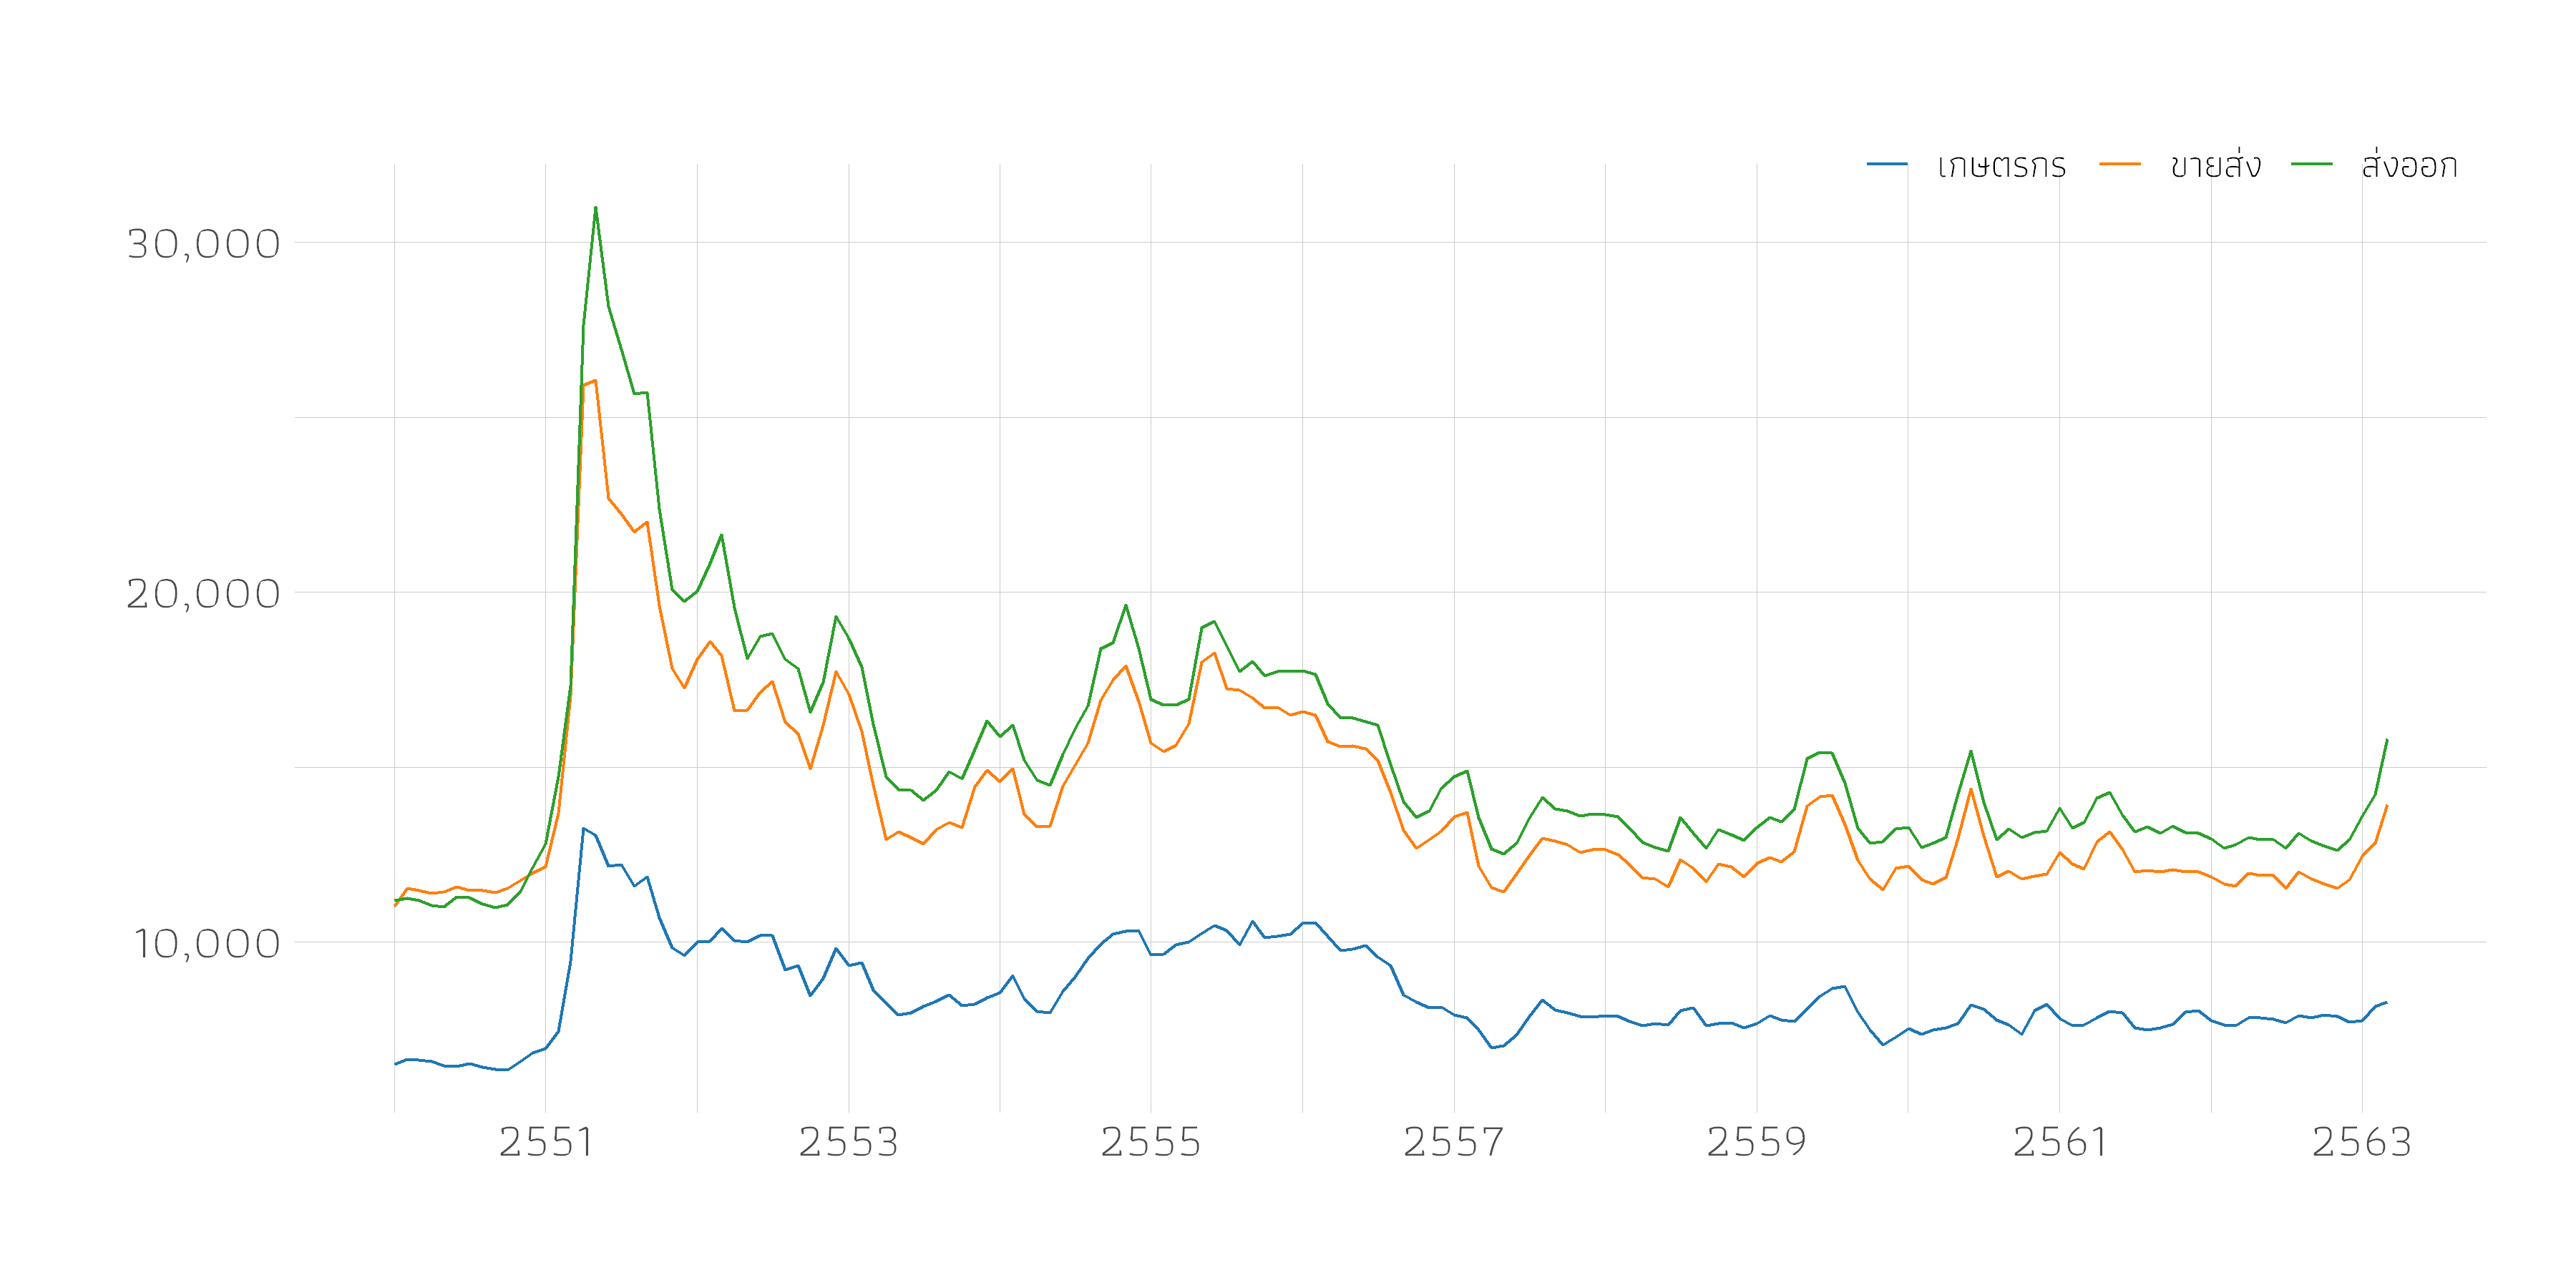

In [25]:
x = list()

x$endo = p_rice_xts['2007/', c('RWXB', 'RWWS', 'RWFG_0')] %>% log()
colnames(x$endo) = c('RWXB', 'RWWS', 'RWFG')

x$exo = p_rice_xts['2007/', c('d_foodcrisis', 'd_pledge')]

set_figsize(12, 6)
p = ts_ggplot(x$endo %>% exp()) +
  labs(
    title = '',
    x = '', y = ''
  ) + 
  theme_ipsum(base_size = 16, base_family = "Athiti Light") +
  scale_y_continuous(label = comma) +
  scale_x_date(
    labels = function(x) year(x) + 543,
    date_breaks = '2 year'
  ) + 
  scale_color_d3(label = c('เกษตรกร', 'ขายส่ง', 'ส่งออก')) +
  theme(legend.position = c(1, 1),
        legend.direction = 'horizontal',
        legend.justification = 'right',
        legend.title = element_blank()
       )
p

ggsave("../img/plot_3m_wht.png", width = 12, height = 6, units = "in")

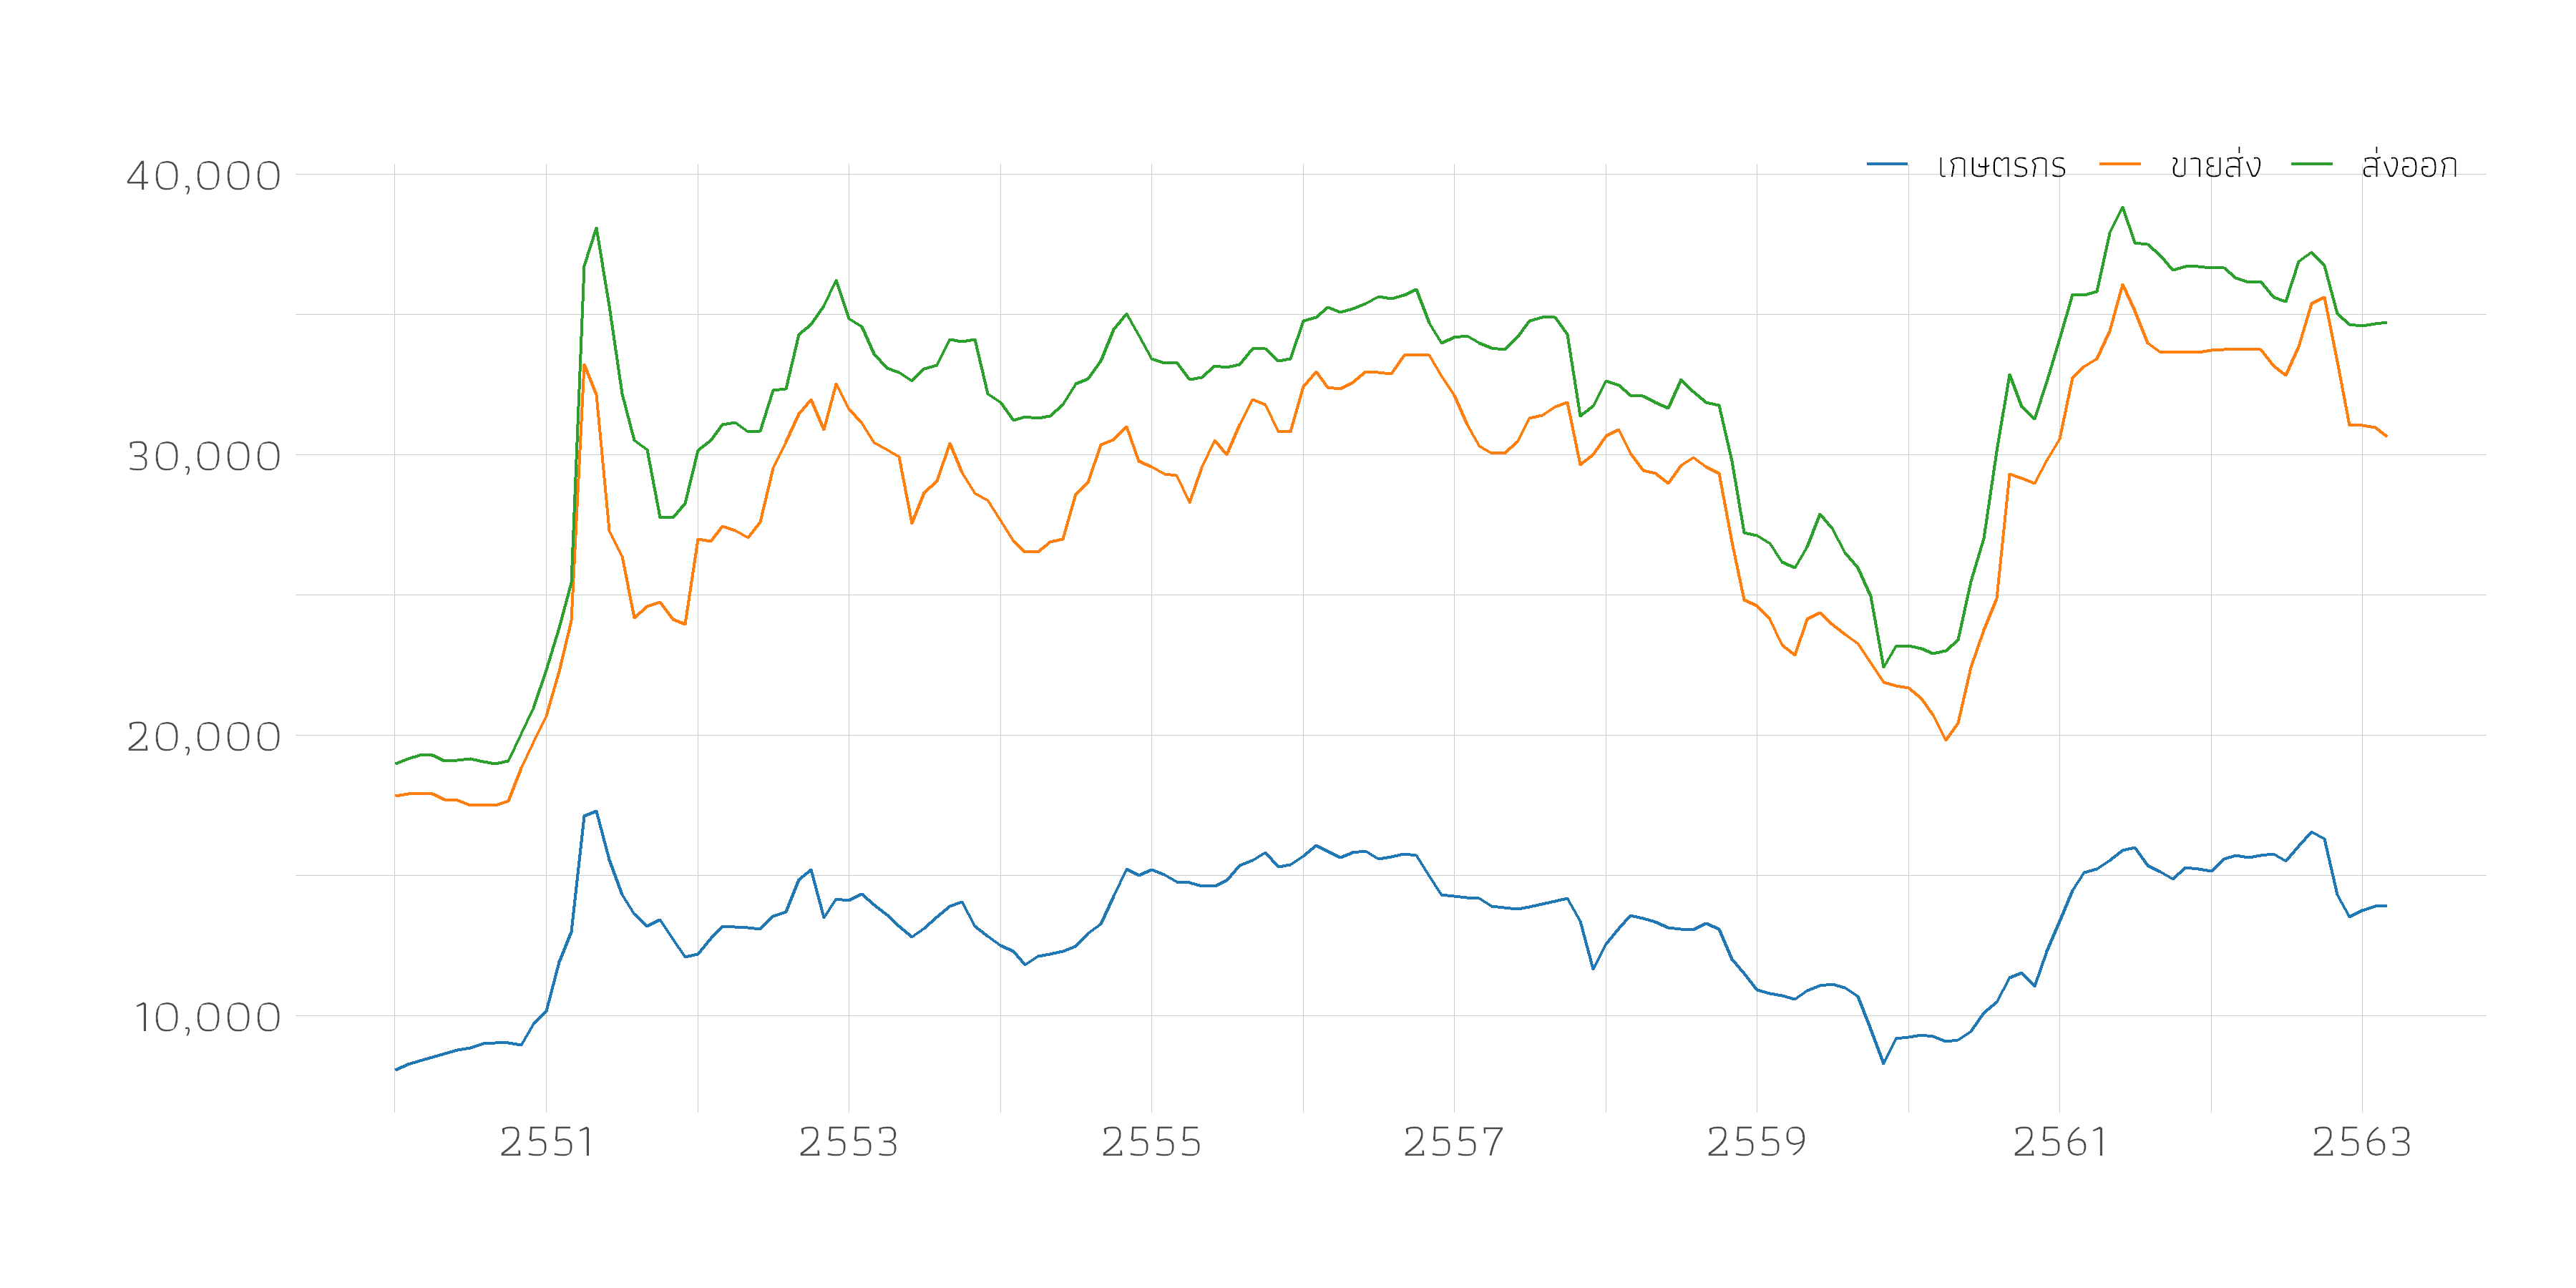

In [24]:
x = list()

x$endo = p_rice_xts['2007/', c('RHXB', 'RHWS', 'RHFG_0')] %>% log()
colnames(x$endo) = c('RHXB', 'RHWS', 'RHFG')

x$exo = p_rice_xts['2007/', c('d_foodcrisis', 'd_pledge')]

set_figsize(12, 6)

p = ts_ggplot(x$endo %>% exp()) +
  labs(
    title = '',
    x = '', y = ''
  ) + 
  theme_ipsum(base_size = 16, base_family = "Athiti Light") +
  scale_y_continuous(label = comma) +
  scale_x_date(
    labels = function(x) year(x) + 543,
    date_breaks = '2 year'
  ) + 
  scale_color_d3(label = c('เกษตรกร', 'ขายส่ง', 'ส่งออก')) +
  theme(legend.position = c(1, 1),
        legend.direction = 'horizontal',
        legend.justification = 'right',
        legend.title = element_blank()
       )
p

ggsave("../img/plot_3m_hml.png", width = 12, height = 6, units = "in")

## White Rice

In [56]:
x = list()

x$endo = p_rice_xts['2007/', c('RWXB', 'RWWS', 'RWFG_0')] %>% log()
colnames(x$endo) = c('RWXB', 'RWWS', 'RWFG')

x$exo = p_rice_xts['2007/', c('d_foodcrisis', 'd_pledge')]
VARselect(x$endo, lag.max = 8, type="const", exogen = x$exo)
VARselect(x$endo, lag.max = 8, type="both", exogen = x$exo)

,1,2,3,4,5,6,7,8
AIC(n),-2.114801e+01,-2.139865e+01,-2.135895e+01,-2.129549e+01,-2.122319e+01,-2.118055e+01,-2.114480e+01,-2.109147e+01
HQ(n),-2.100189e+01,-2.117947e+01,-2.106671e+01,-2.093019e+01,-2.078483e+01,-2.066914e+01,-2.056033e+01,-2.043393e+01
SC(n),-2.078834e+01,-2.085913e+01,-2.063960e+01,-2.039630e+01,-2.014416e+01,-1.992169e+01,-1.970610e+01,-1.947293e+01
FPE(n),6.540179e-10,5.091778e-10,5.301059e-10,5.653828e-10,6.086521e-10,6.364532e-10,6.614102e-10,7.000917e-10


,1,2,3,4,5,6,7,8
AIC(n),-2.127890e+01,-2.151937e+01,-2.142616e+01,-2.134868e+01,-2.127530e+01,-2.124226e+01,-2.118767e+01,-2.112624e+01
HQ(n),-2.110842e+01,-2.127584e+01,-2.110956e+01,-2.095903e+01,-2.081259e+01,-2.070649e+01,-2.057884e+01,-2.044436e+01
SC(n),-2.085927e+01,-2.091991e+01,-2.064686e+01,-2.038954e+01,-2.013633e+01,-1.992345e+01,-1.968902e+01,-1.944776e+01
FPE(n),5.738253e-10,4.513471e-10,4.957878e-10,5.363231e-10,5.780963e-10,5.988574e-10,6.343395e-10,6.770857e-10


In [64]:
var.rw = VAR(x$endo, type = 'const', p = 2, exogen = x$exo)

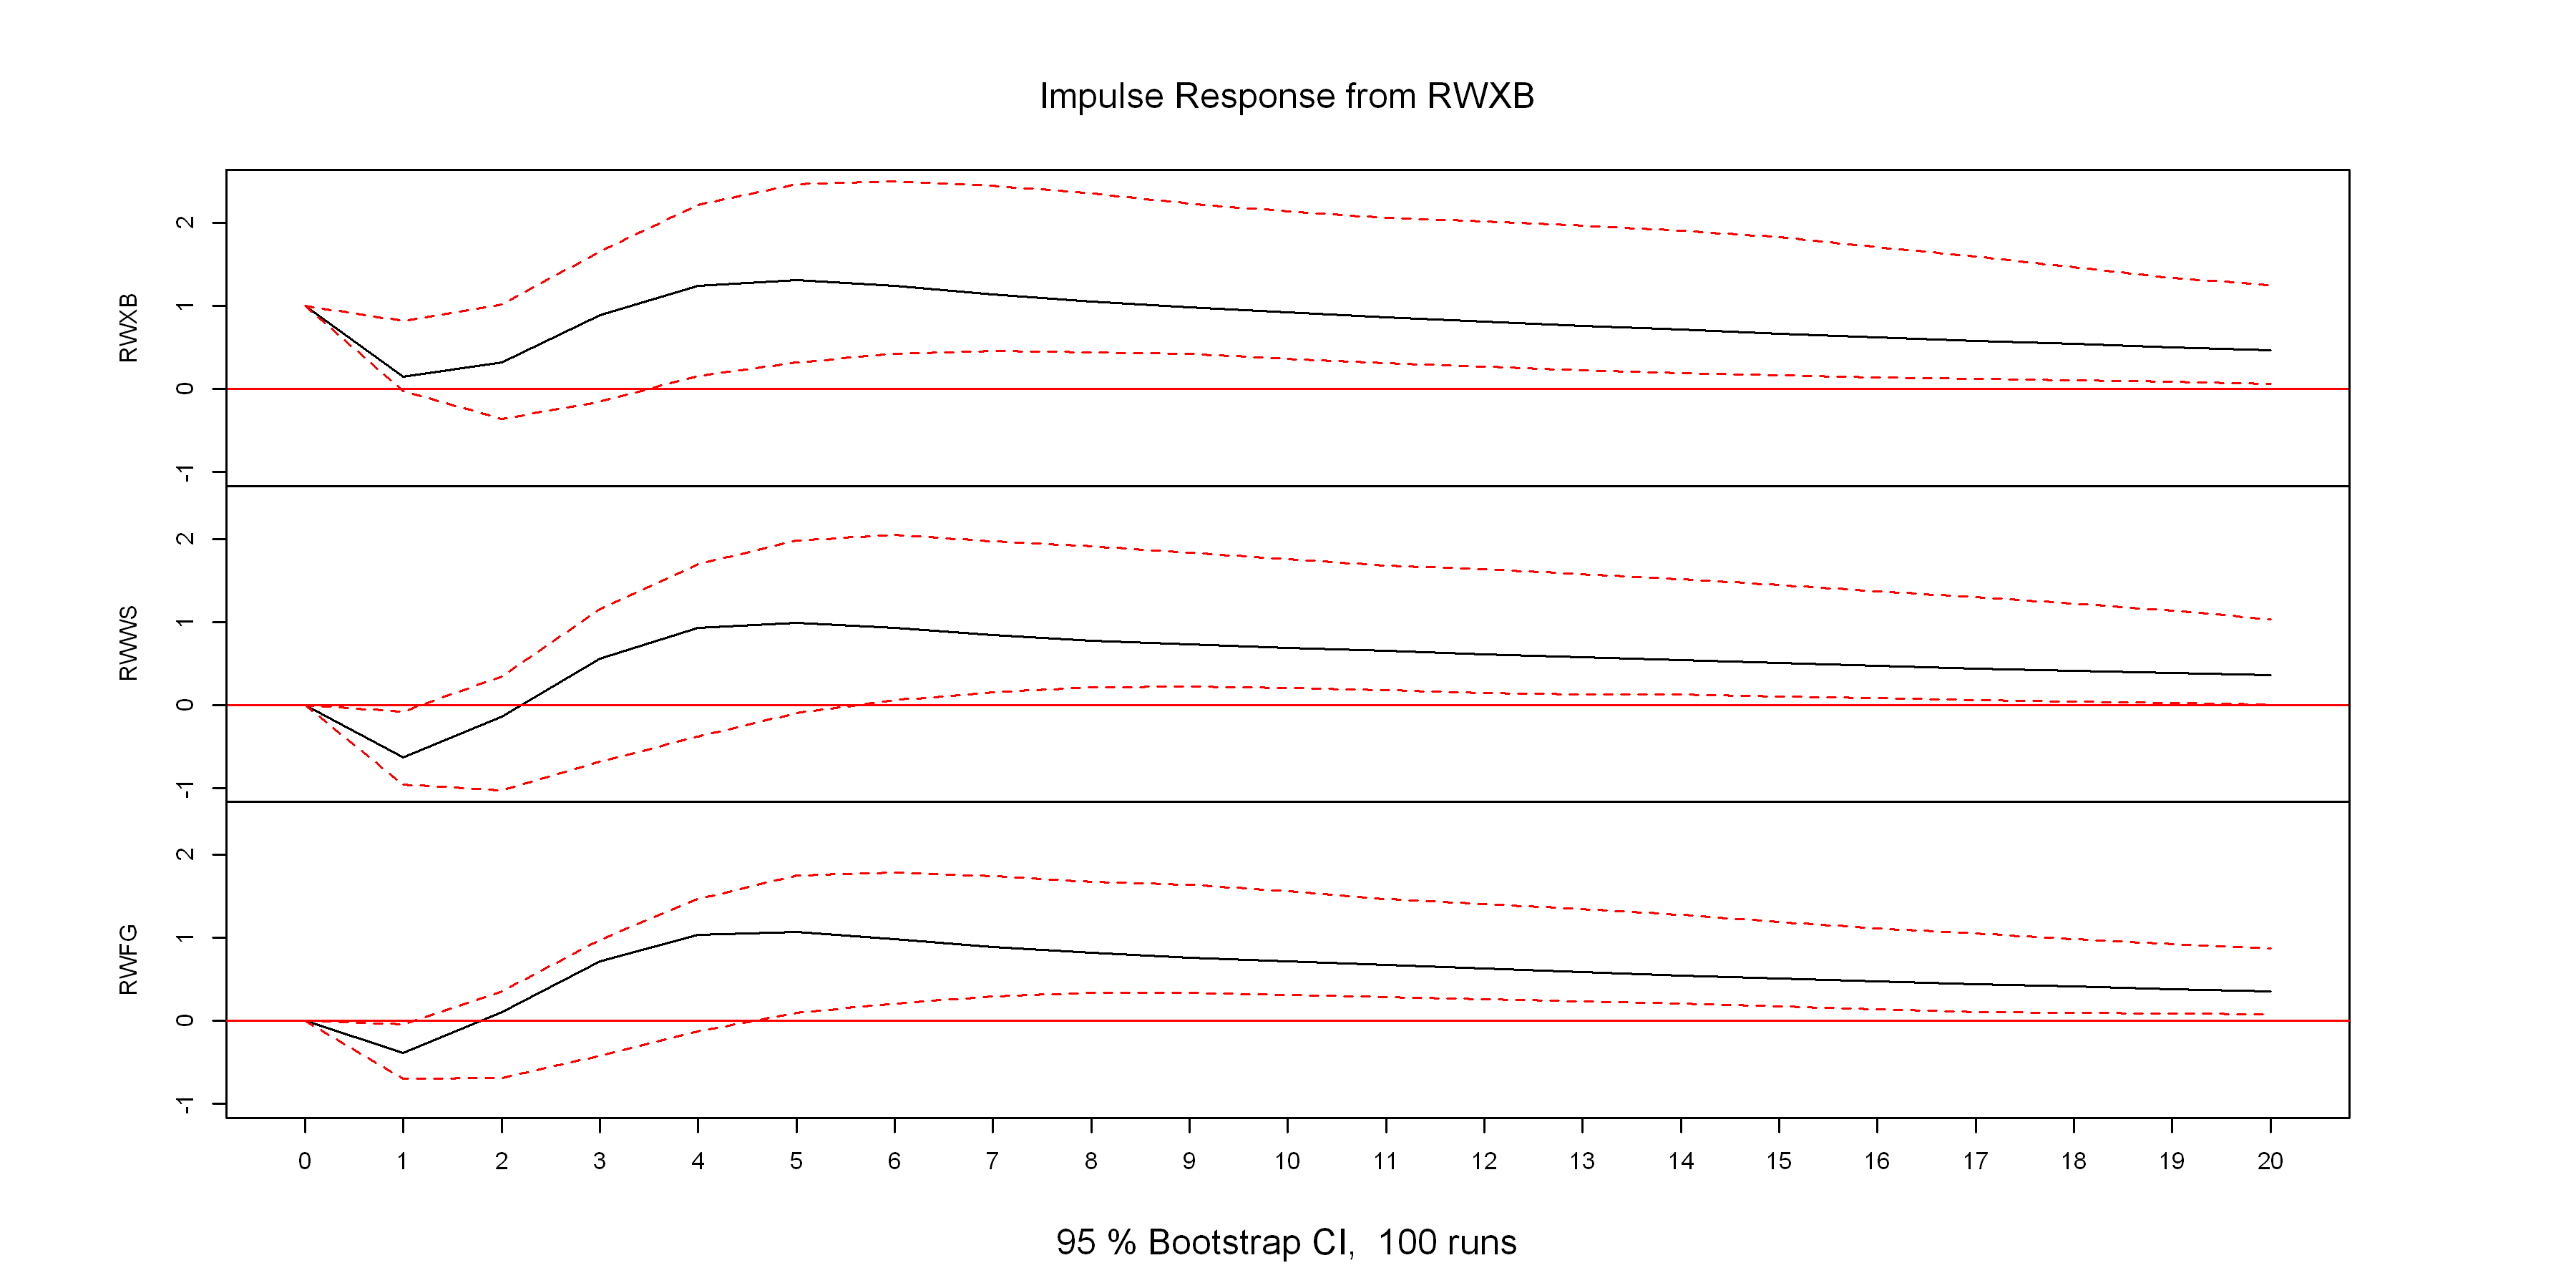

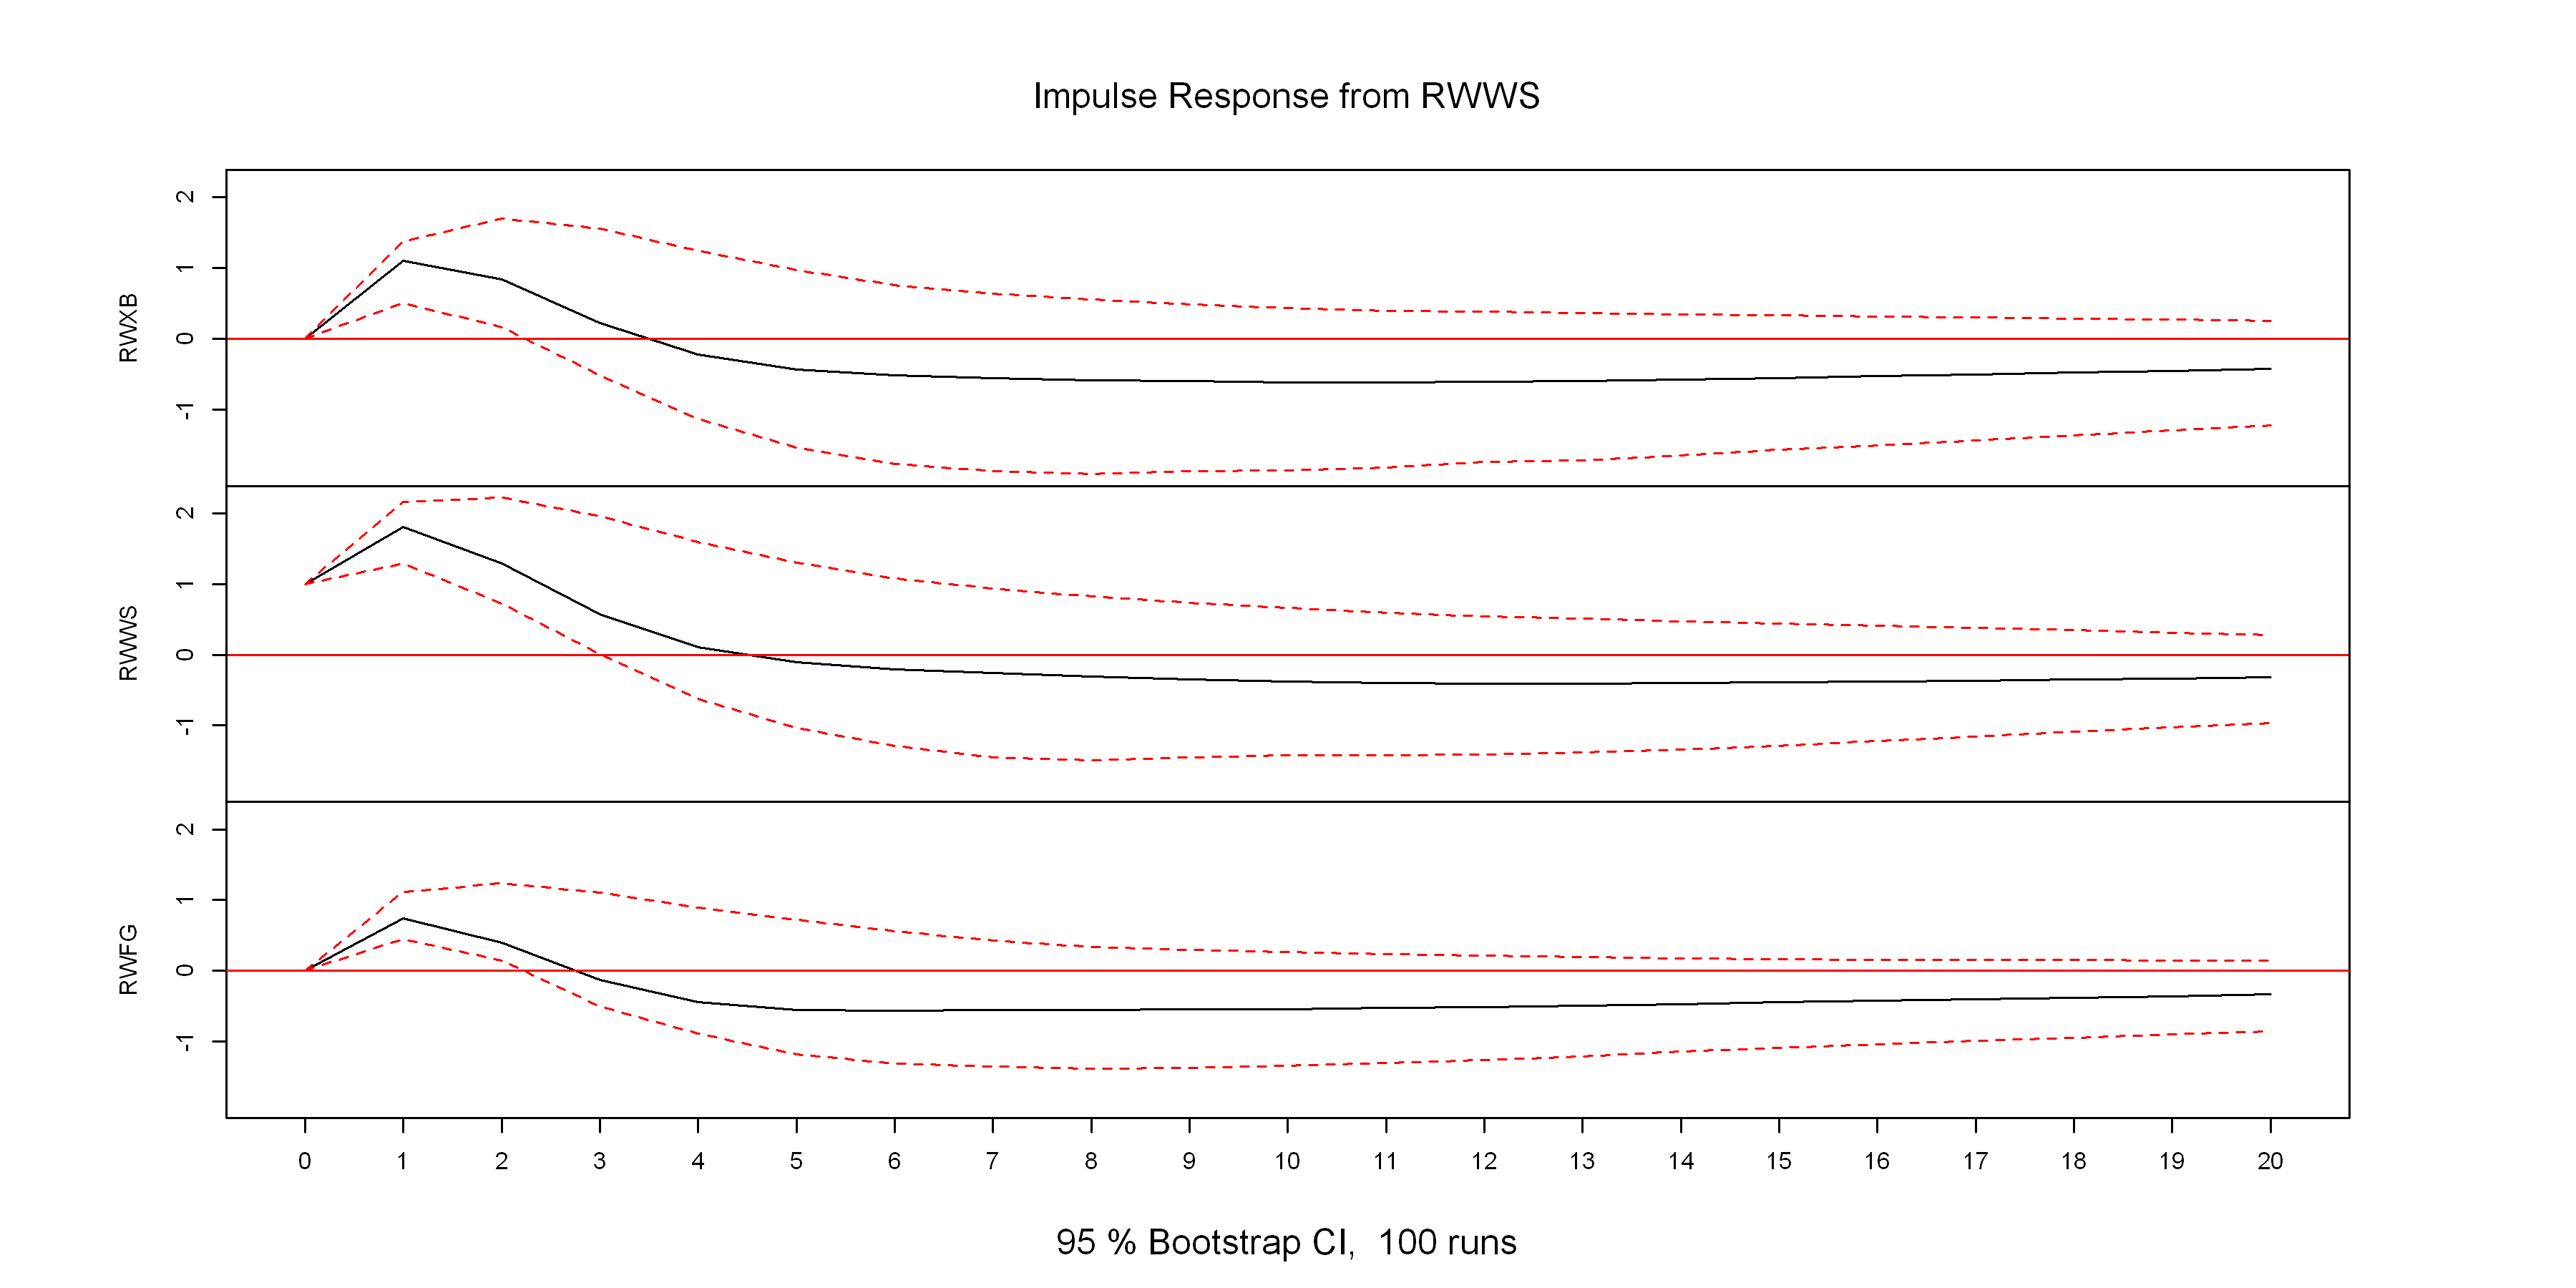

In [69]:
plot(irf(var.rw, impulse = 'RHFG', n.ahead = 12, ortho = FALSE))

irf(var.rw, n.ahead = 20, ortho = FALSE) %>% plot()

## Model Specification

### Lag

In [9]:
VARselect(x$endo, lag.max = 8, type="const", exogen = x$exo)
VARselect(x$endo, lag.max = 8, type="both", exogen = x$exo)

,1,2,3,4,5,6,7,8
AIC(n),-2.180555e+01,-2.189705e+01,-2.182267e+01,-2.173330e+01,-2.174674e+01,-2.169157e+01,-2.161081e+01,-2.157285e+01
HQ(n),-2.166907e+01,-2.167868e+01,-2.152240e+01,-2.135115e+01,-2.128269e+01,-2.114564e+01,-2.098298e+01,-2.086314e+01
SC(n),-2.146963e+01,-2.135957e+01,-2.108363e+01,-2.079270e+01,-2.060458e+01,-2.034786e+01,-2.006554e+01,-1.982603e+01
FPE(n),3.388606e-10,3.093488e-10,3.335059e-10,3.651904e-10,3.610926e-10,3.827500e-10,4.166858e-10,4.351875e-10


,1,2,3,4,5,6,7,8
AIC(n),-2.182454e+01,-2.189950e+01,-2.182792e+01,-2.172893e+01,-2.175772e+01,-2.169564e+01,-2.161161e+01,-2.157324e+01
HQ(n),-2.166076e+01,-2.165383e+01,-2.150036e+01,-2.131948e+01,-2.126638e+01,-2.112241e+01,-2.095649e+01,-2.083623e+01
SC(n),-2.142142e+01,-2.129483e+01,-2.102169e+01,-2.072115e+01,-2.054838e+01,-2.028475e+01,-1.999916e+01,-1.975923e+01
FPE(n),3.325181e-10,3.086585e-10,3.318879e-10,3.670187e-10,3.574762e-10,3.816756e-10,4.170502e-10,4.359536e-10


number of lags = 2

In [10]:
n.lag = 2

res.trace.const = ca.jo(
  x$endo, type = "trace", ecdet = "const", K = n.lag,
  spec = "transitory", dumvar = x$exo
)

res.eigen.const = ca.jo(
  x$endo, type = "eigen", ecdet = "const", K = n.lag,
  spec = "transitory", dumvar = x$exo
)

res.trace.trend = ca.jo(
  x$endo, type = "trace", ecdet = "trend", K = n.lag,
  spec = "transitory", dumvar = x$exo
)

res.eigen.trend = ca.jo(
  x$endo, type = "eigen", ecdet = "trend", K = n.lag,
  spec = "transitory", dumvar = x$exo
)

In [19]:
res.trace.const %>% summary()
res.eigen.const %>% summary()
res.trace.trend %>% summary()
res.eigen.trend %>% summary()


###################### 
# Johansen-Procedure # 
###################### 

Test type: trace statistic , without linear trend and constant in cointegration 

Eigenvalues (lambda):
[1] 0.16340680 0.11360221 0.03406606 0.00000000

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 2 |  4.61  7.52  9.24 12.97
r <= 1 | 20.65 17.85 19.96 24.60
r = 0  | 44.38 32.00 34.91 41.07

Eigenvectors, normalised to first column:
(These are the cointegration relations)

           RHXB.l1    RHWS.l1      RHFG.l1   constant
RHXB.l1     1.0000  1.0000000   1.00000000  1.0000000
RHWS.l1   404.4148 -0.6641121   0.25904863  0.2496218
RHFG.l1  -381.6790 -0.2624292  -0.05620397 -0.6841282
constant -550.9614 -1.0668946 -12.51997206 -5.9742344

Weights W:
(This is the loading matrix)

             RHXB.l1     RHWS.l1     RHFG.l1      constant
RHXB.d  8.085148e-05 0.009012117 -0.03529854 -6.097942e-15
RHWS.d -1.525533e-04 0.275138029 -0.02815984 -7.174199e-15
RHFG.d  6.6799


###################### 
# Johansen-Procedure # 
###################### 

Test type: maximal eigenvalue statistic (lambda max) , without linear trend and constant in cointegration 

Eigenvalues (lambda):
[1] 0.16340680 0.11360221 0.03406606 0.00000000

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 2 |  4.61  7.52  9.24 12.97
r <= 1 | 16.04 13.75 15.67 20.20
r = 0  | 23.73 19.77 22.00 26.81

Eigenvectors, normalised to first column:
(These are the cointegration relations)

           RHXB.l1    RHWS.l1      RHFG.l1   constant
RHXB.l1     1.0000  1.0000000   1.00000000  1.0000000
RHWS.l1   404.4148 -0.6641121   0.25904863  0.2496218
RHFG.l1  -381.6790 -0.2624292  -0.05620397 -0.6841282
constant -550.9614 -1.0668946 -12.51997206 -5.9742344

Weights W:
(This is the loading matrix)

             RHXB.l1     RHWS.l1     RHFG.l1      constant
RHXB.d  8.085148e-05 0.009012117 -0.03529854 -6.097942e-15
RHWS.d -1.525533e-04 0.275138029 -0.02815984 -7


###################### 
# Johansen-Procedure # 
###################### 

Test type: trace statistic , with linear trend in cointegration 

Eigenvalues (lambda):
[1] 1.804535e-01 1.230210e-01 3.358913e-02 5.652429e-18

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 2 |  4.54 10.49 12.25 16.26
r <= 1 | 22.00 22.76 25.32 30.45
r = 0  | 48.47 39.06 42.44 48.45

Eigenvectors, normalised to first column:
(These are the cointegration relations)

               RHXB.l1       RHWS.l1       RHFG.l1     trend.l1
RHXB.l1   1.0000000000  1.0000000000  1.0000000000  1.000000000
RHWS.l1  -2.5053961170 -0.5531450932  0.2439737846 -1.026437036
RHFG.l1   1.4597250432 -0.3703631259 -0.0890499199  0.094103477
trend.l1  0.0007429377  0.0001681338 -0.0002011798  0.007150173

Weights W:
(This is the loading matrix)

           RHXB.l1    RHWS.l1     RHFG.l1      trend.l1
RHXB.d -0.01675952 0.02732025 -0.03700490 -5.448260e-17
RHWS.d  0.06545870 0.26789624 -0.0290


###################### 
# Johansen-Procedure # 
###################### 

Test type: maximal eigenvalue statistic (lambda max) , with linear trend in cointegration 

Eigenvalues (lambda):
[1] 1.804535e-01 1.230210e-01 3.358913e-02 5.652429e-18

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 2 |  4.54 10.49 12.25 16.26
r <= 1 | 17.46 16.85 18.96 23.65
r = 0  | 26.47 23.11 25.54 30.34

Eigenvectors, normalised to first column:
(These are the cointegration relations)

               RHXB.l1       RHWS.l1       RHFG.l1     trend.l1
RHXB.l1   1.0000000000  1.0000000000  1.0000000000  1.000000000
RHWS.l1  -2.5053961170 -0.5531450932  0.2439737846 -1.026437036
RHFG.l1   1.4597250432 -0.3703631259 -0.0890499199  0.094103477
trend.l1  0.0007429377  0.0001681338 -0.0002011798  0.007150173

Weights W:
(This is the loading matrix)

           RHXB.l1    RHWS.l1     RHFG.l1      trend.l1
RHXB.d -0.01675952 0.02732025 -0.03700490 -5.448260e-17
RHWS.d  0.0

In [33]:
cajorls(res.trace.trend, r = 1)$rlm


Call:
lm(formula = substitute(form1), data = data.mat)

Coefficients:
          RHXB.d      RHWS.d      RHFG.d    
ect1      -0.0167595   0.0654587  -0.1304521
constant  -0.0242109   0.0976377  -0.1939602
d_pledge   0.0008598  -0.0049163   0.0109162
RHXB.dl1   0.3643798   0.5808804   0.6713779
RHWS.dl1  -0.0328908   0.0320928  -0.0672652
RHFG.dl1   0.0308252  -0.0976879   0.0322960


In [25]:
# res.trace.const %>% summary()
str(cajorls(res.trace.trend, r = 1)$rlm)

List of 12
 $ coefficients : num [1:6, 1:3] -0.01676 -0.02421 0.00086 0.36438 -0.03289 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:6] "ect1" "constant" "d_pledge" "RHXB.dl1" ...
  .. ..$ : chr [1:3] "RHXB.d" "RHWS.d" "RHFG.d"
 $ residuals    : num [1:133, 1:3] 0.01239 -0.004 -0.01097 0.00531 0.04671 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:133] "2009-02-01" "2009-03-01" "2009-04-01" "2009-05-01" ...
  .. ..$ : chr [1:3] "RHXB.d" "RHWS.d" "RHFG.d"
 $ effects      : num [1:133, 1:3] -0.01157 0.00684 0.00229 0.12213 0.00433 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:133] "ect1" "constant" "d_pledge" "RHXB.dl1" ...
  .. ..$ : chr [1:3] "RHXB.d" "RHWS.d" "RHFG.d"
 $ rank         : int 6
 $ fitted.values: num [1:133, 1:3] 0.005659 0.006375 0.000212 -0.004687 -0.000618 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:133] "2009-02-01" "2009-03-01" "2009-04-01" "2009-05-01" ...
  .. ..$ : chr [1:3] "RHXB.d" "RHWS.d" "RHFG.d"
 $ assign     

In [36]:
n_lag = 2

c2 = VECM(x$endo %>% tk_ts(), lag = n_lag, estim = "ML", 
          LRinclude = 'const',
          exogen = x$exo %>% tk_ts())

c3 = VECM(x$endo %>% tk_ts(), lag = n_lag, estim = "ML", 
          include = 'const', 
          exogen = x$exo %>% tk_ts())

c4 = VECM(x$endo %>% tk_ts(), lag = n_lag, estim = "ML", 
          LRinclude = 'trend',
          exogen = x$exo %>% tk_ts())

AIC(c2)
AIC(c3)
AIC(c4)

[1] -2881.73

[1] -2875.838

[1] -2878.089

In [49]:
vecm = VECM(x$endo[, c(1,2,3)], r = 1, lag = 3, estim = "ML", 
            include = 'const',
            LRinclude = 'trend',
            exogen = x$exo
           )

var_urca = tsDyn:::vec2var.tsDyn(vecm)

ERROR: Error in try.xts(structure(c(NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, : Error in as.xts.matrix(x, ..., .RECLASS = TRUE) :   order.by must be either 'rownames()' or otherwise specified


In [53]:
n.lag = 3
res.trace.const = ca.jo(
  x$endo, type = "trace", ecdet = "const", K = n.lag ,
  spec = "transitory", dumvar = x$exo
)
# res.trace.const %>% summary()
cajorls(res.trace.const, r = 2)$rlm %>% summary()

Response RHXB.d :

Call:
lm(formula = RHXB.d ~ ect1 + ect2 + d_pledge + RHXB.dl1 + RHWS.dl1 + 
    RHFG.dl1 + RHXB.dl2 + RHWS.dl2 + RHFG.dl2 - 1, data = data.mat)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.090809 -0.010206  0.000348  0.010171  0.090294 

Coefficients:
          Estimate Std. Error t value Pr(>|t|)  
ect1      0.040227   0.107641   0.374   0.7093  
ect2     -0.013491   0.098205  -0.137   0.8910  
d_pledge  0.001908   0.007448   0.256   0.7982  
RHXB.dl1  0.316243   0.152402   2.075   0.0401 *
RHWS.dl1  0.028672   0.130401   0.220   0.8263  
RHFG.dl1  0.034811   0.088711   0.392   0.6954  
RHXB.dl2 -0.168336   0.153210  -1.099   0.2740  
RHWS.dl2  0.097090   0.123467   0.786   0.4332  
RHFG.dl2  0.017406   0.083614   0.208   0.8354  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.02808 on 123 degrees of freedom
Multiple R-squared:  0.1412,	Adjusted R-squared:  0.07833 
F-statistic: 2.247 on 9 and 123 

In [41]:
n.lag = 2
res.trace.const = ca.jo(
  x$endo, type = "trace", ecdet = "const", K = n.lag ,
  spec = "transitory", dumvar = x$exo
)

res.eigen.const = ca.jo(
  x$endo, type = "eigen", ecdet = "const", K = n.lag ,
  spec = "transitory", dumvar = x$exo
)

res.trace.trend = ca.jo(
  x$endo, type = "trace", ecdet = "trend", K = n.lag ,
  spec = "transitory", dumvar = x$exo
)

res.eigen.trend = ca.jo(
  x$endo, type = "eigen", ecdet = "trend", K = n.lag ,
  spec = "transitory", dumvar = x$exo
)

In [40]:
res.trace.trend %>% summary()


###################### 
# Johansen-Procedure # 
###################### 

Test type: trace statistic , with linear trend in cointegration 

Eigenvalues (lambda):
[1] 1.695561e-01 7.533487e-02 3.191183e-02 3.116404e-17

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 2 |  4.31 10.49 12.25 16.26
r <= 1 | 14.73 22.76 25.32 30.45
r = 0  | 39.44 39.06 42.44 48.45

Eigenvectors, normalised to first column:
(These are the cointegration relations)

               RHXB.l1       RHWS.l1      RHFG.l1     trend.l1
RHXB.l1   1.0000000000  1.000000e+00 1.0000000000  1.000000000
RHWS.l1  -1.4572592047 -2.952757e-01 0.4630642217 -0.857429738
RHFG.l1   0.4667975113 -5.505066e-01 0.3494454774 -0.041647381
trend.l1  0.0004757007 -8.689056e-05 0.0001636708  0.006259257

Weights W:
(This is the loading matrix)

           RHXB.l1     RHWS.l1     RHFG.l1      trend.l1
RHXB.d -0.01975361 -0.01283341 -0.02119699  3.823106e-15
RHWS.d  0.19045838  0.08522938 -0.017774

In [42]:
res.eigen.const %>% summary()


###################### 
# Johansen-Procedure # 
###################### 

Test type: maximal eigenvalue statistic (lambda max) , without linear trend and constant in cointegration 

Eigenvalues (lambda):
[1] 0.16340680 0.11360221 0.03406606 0.00000000

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 2 |  4.61  7.52  9.24 12.97
r <= 1 | 16.04 13.75 15.67 20.20
r = 0  | 23.73 19.77 22.00 26.81

Eigenvectors, normalised to first column:
(These are the cointegration relations)

           RHXB.l1    RHWS.l1      RHFG.l1   constant
RHXB.l1     1.0000  1.0000000   1.00000000  1.0000000
RHWS.l1   404.4148 -0.6641121   0.25904863  0.2496218
RHFG.l1  -381.6790 -0.2624292  -0.05620397 -0.6841282
constant -550.9614 -1.0668946 -12.51997206 -5.9742344

Weights W:
(This is the loading matrix)

             RHXB.l1     RHWS.l1     RHFG.l1      constant
RHXB.d  8.085148e-05 0.009012117 -0.03529854 -6.097942e-15
RHWS.d -1.525533e-04 0.275138029 -0.02815984 -7

In [43]:
res.eigen.trend %>% summary()


###################### 
# Johansen-Procedure # 
###################### 

Test type: maximal eigenvalue statistic (lambda max) , with linear trend in cointegration 

Eigenvalues (lambda):
[1] 1.804535e-01 1.230210e-01 3.358913e-02 5.652429e-18

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 2 |  4.54 10.49 12.25 16.26
r <= 1 | 17.46 16.85 18.96 23.65
r = 0  | 26.47 23.11 25.54 30.34

Eigenvectors, normalised to first column:
(These are the cointegration relations)

               RHXB.l1       RHWS.l1       RHFG.l1     trend.l1
RHXB.l1   1.0000000000  1.0000000000  1.0000000000  1.000000000
RHWS.l1  -2.5053961170 -0.5531450932  0.2439737846 -1.026437036
RHFG.l1   1.4597250432 -0.3703631259 -0.0890499199  0.094103477
trend.l1  0.0007429377  0.0001681338 -0.0002011798  0.007150173

Weights W:
(This is the loading matrix)

           RHXB.l1    RHWS.l1     RHFG.l1      trend.l1
RHXB.d -0.01675952 0.02732025 -0.03700490 -5.448260e-17
RHWS.d  0.0

In [44]:
round(res.trace.const@V, 2)

,RHXB.l1,RHWS.l1,RHFG.l1,constant
RHXB.l1,1.00,1.00,1.00,1.00
RHWS.l1,404.41,-0.66,0.26,0.25
RHFG.l1,-381.68,-0.26,-0.06,-0.68
constant,-550.96,-1.07,-12.52,-5.97


In [130]:
round(res.trace.const@W, 2)

,RHXB.l1,RHWS.l1,RHFG.l1,constant
RHXB.d,-0.22,-0.01,0.02,0
RHWS.d,-0.02,0.01,0.03,0
RHFG.d,-0.17,0.08,0.02,0


In [131]:
round(res.trace.const@GAMMA, 2)

,RHXB.dl1,RHWS.dl1,RHFG.dl1
RHXB.d,0.23,0.07,0.07
RHWS.d,0.20,0.10,0.03
RHFG.d,0.22,0.18,0.09


In [132]:
var = vec2var(res.trace.trend, r = 1)

In [ ]:
set_figsize(10,10)

In [143]:
vecm = VECM(x$endo[, c(1,2,3)], r = 1, lag = 2, estim = "ML", 
#             include = 'none',
            LRinclude = 'trend',
            exogen = x$exo
           )

var_urca = tsDyn:::vec2var.tsDyn(vecm)

In [144]:
vecm %>% summary()

Warning message in if (class(x) == "numeric") return(noquote(r)):
"the condition has length > 1 and only the first element will be used"
Warning message in if (class(x) == "matrix") return(matrix(noquote(r), ncol = ncol(x), :
"the condition has length > 1 and only the first element will be used"
Warning message in if (class(x) == "numeric") return(noquote(r)):
"the condition has length > 1 and only the first element will be used"
Warning message in if (class(x) == "matrix") return(matrix(noquote(r), ncol = ncol(x), :
"the condition has length > 1 and only the first element will be used"


#############
###Model VECM 
#############
Full sample size: 159 	End sample size: 156
Number of variables: 3 	Number of estimated slope parameters 24
AIC -3234.378 	BIC -3155.081 	SSR 0.8043756
Cointegrating vector (estimated by ML):
   RHXB     RHWS      RHFG        trend
r1    1 -1.54119 0.5509266 0.0007250516


              ECT                 Intercept           RHXB -1           
Equation RHXB -0.0773(0.0714)     -0.0103(0.0123)     0.1366(0.1520)    
Equation RHWS 0.0568(0.0778)      0.0121(0.0134)      0.1905(0.1656)    
Equation RHFG -0.1993(0.0785)*    -0.0312(0.0135)*    0.2952(0.1670).   
              RHWS -1            RHFG -1            RHXB -2            
Equation RHXB 0.1091(0.1502)     0.1298(0.1043)     -0.3367(0.1496)*   
Equation RHWS 0.1144(0.1637)     0.0772(0.1136)     -0.3407(0.1630)*   
Equation RHFG 0.0714(0.1651)     0.1343(0.1146)     -0.0605(0.1644)    
              RHWS -2             RHFG -2           
Equation RHXB 0.1179(0.1453)      0.2123(0.1011)* 

In [150]:
ir$irf

RHXB,RHWS,RHFG
0.03897157,0.03555448,0.02932922
0.05195471,0.04932733,0.04724546
0.05470246,0.04768327,0.04870790
...,...,...
0.05023271,0.04640186,0.03904782
0.05012759,0.04636669,0.03889366
0.05007475,0.04634759,0.03880980


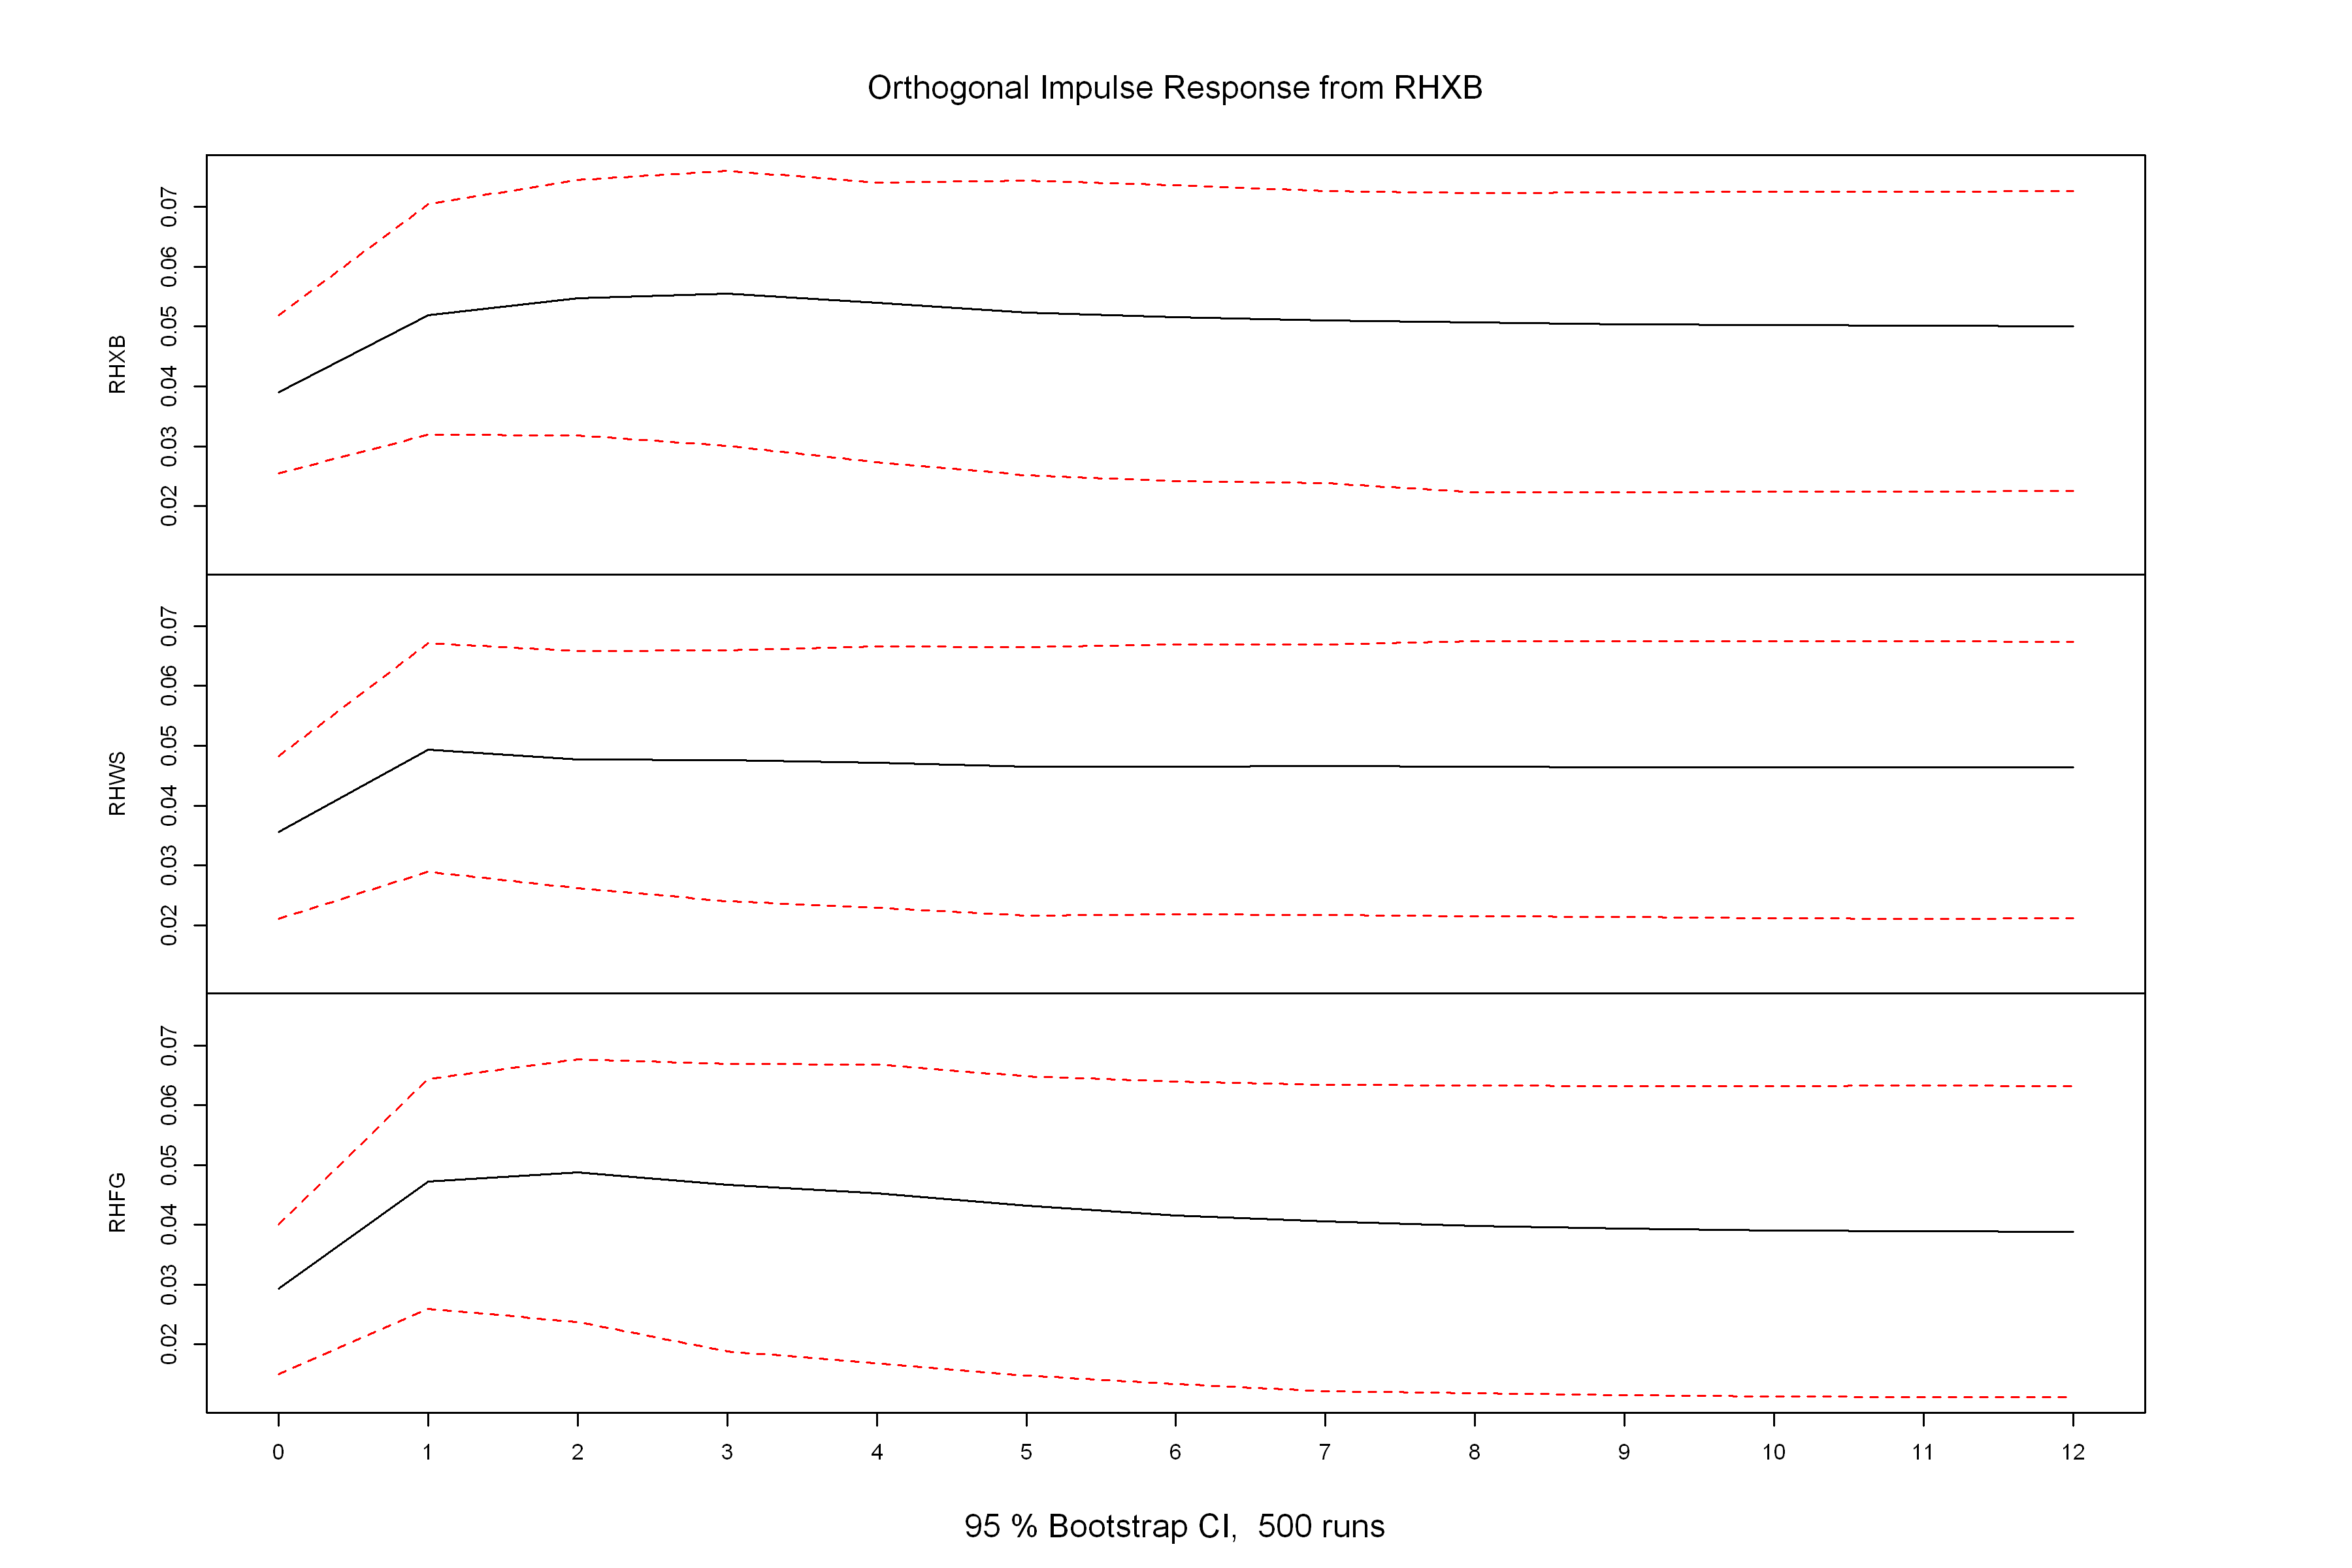

In [149]:
ir = irf(var_urca, n.ahead = 12, impulse = "RHXB",
         ortho = TRUE, runs = 500)

# Plot
plot(ir)

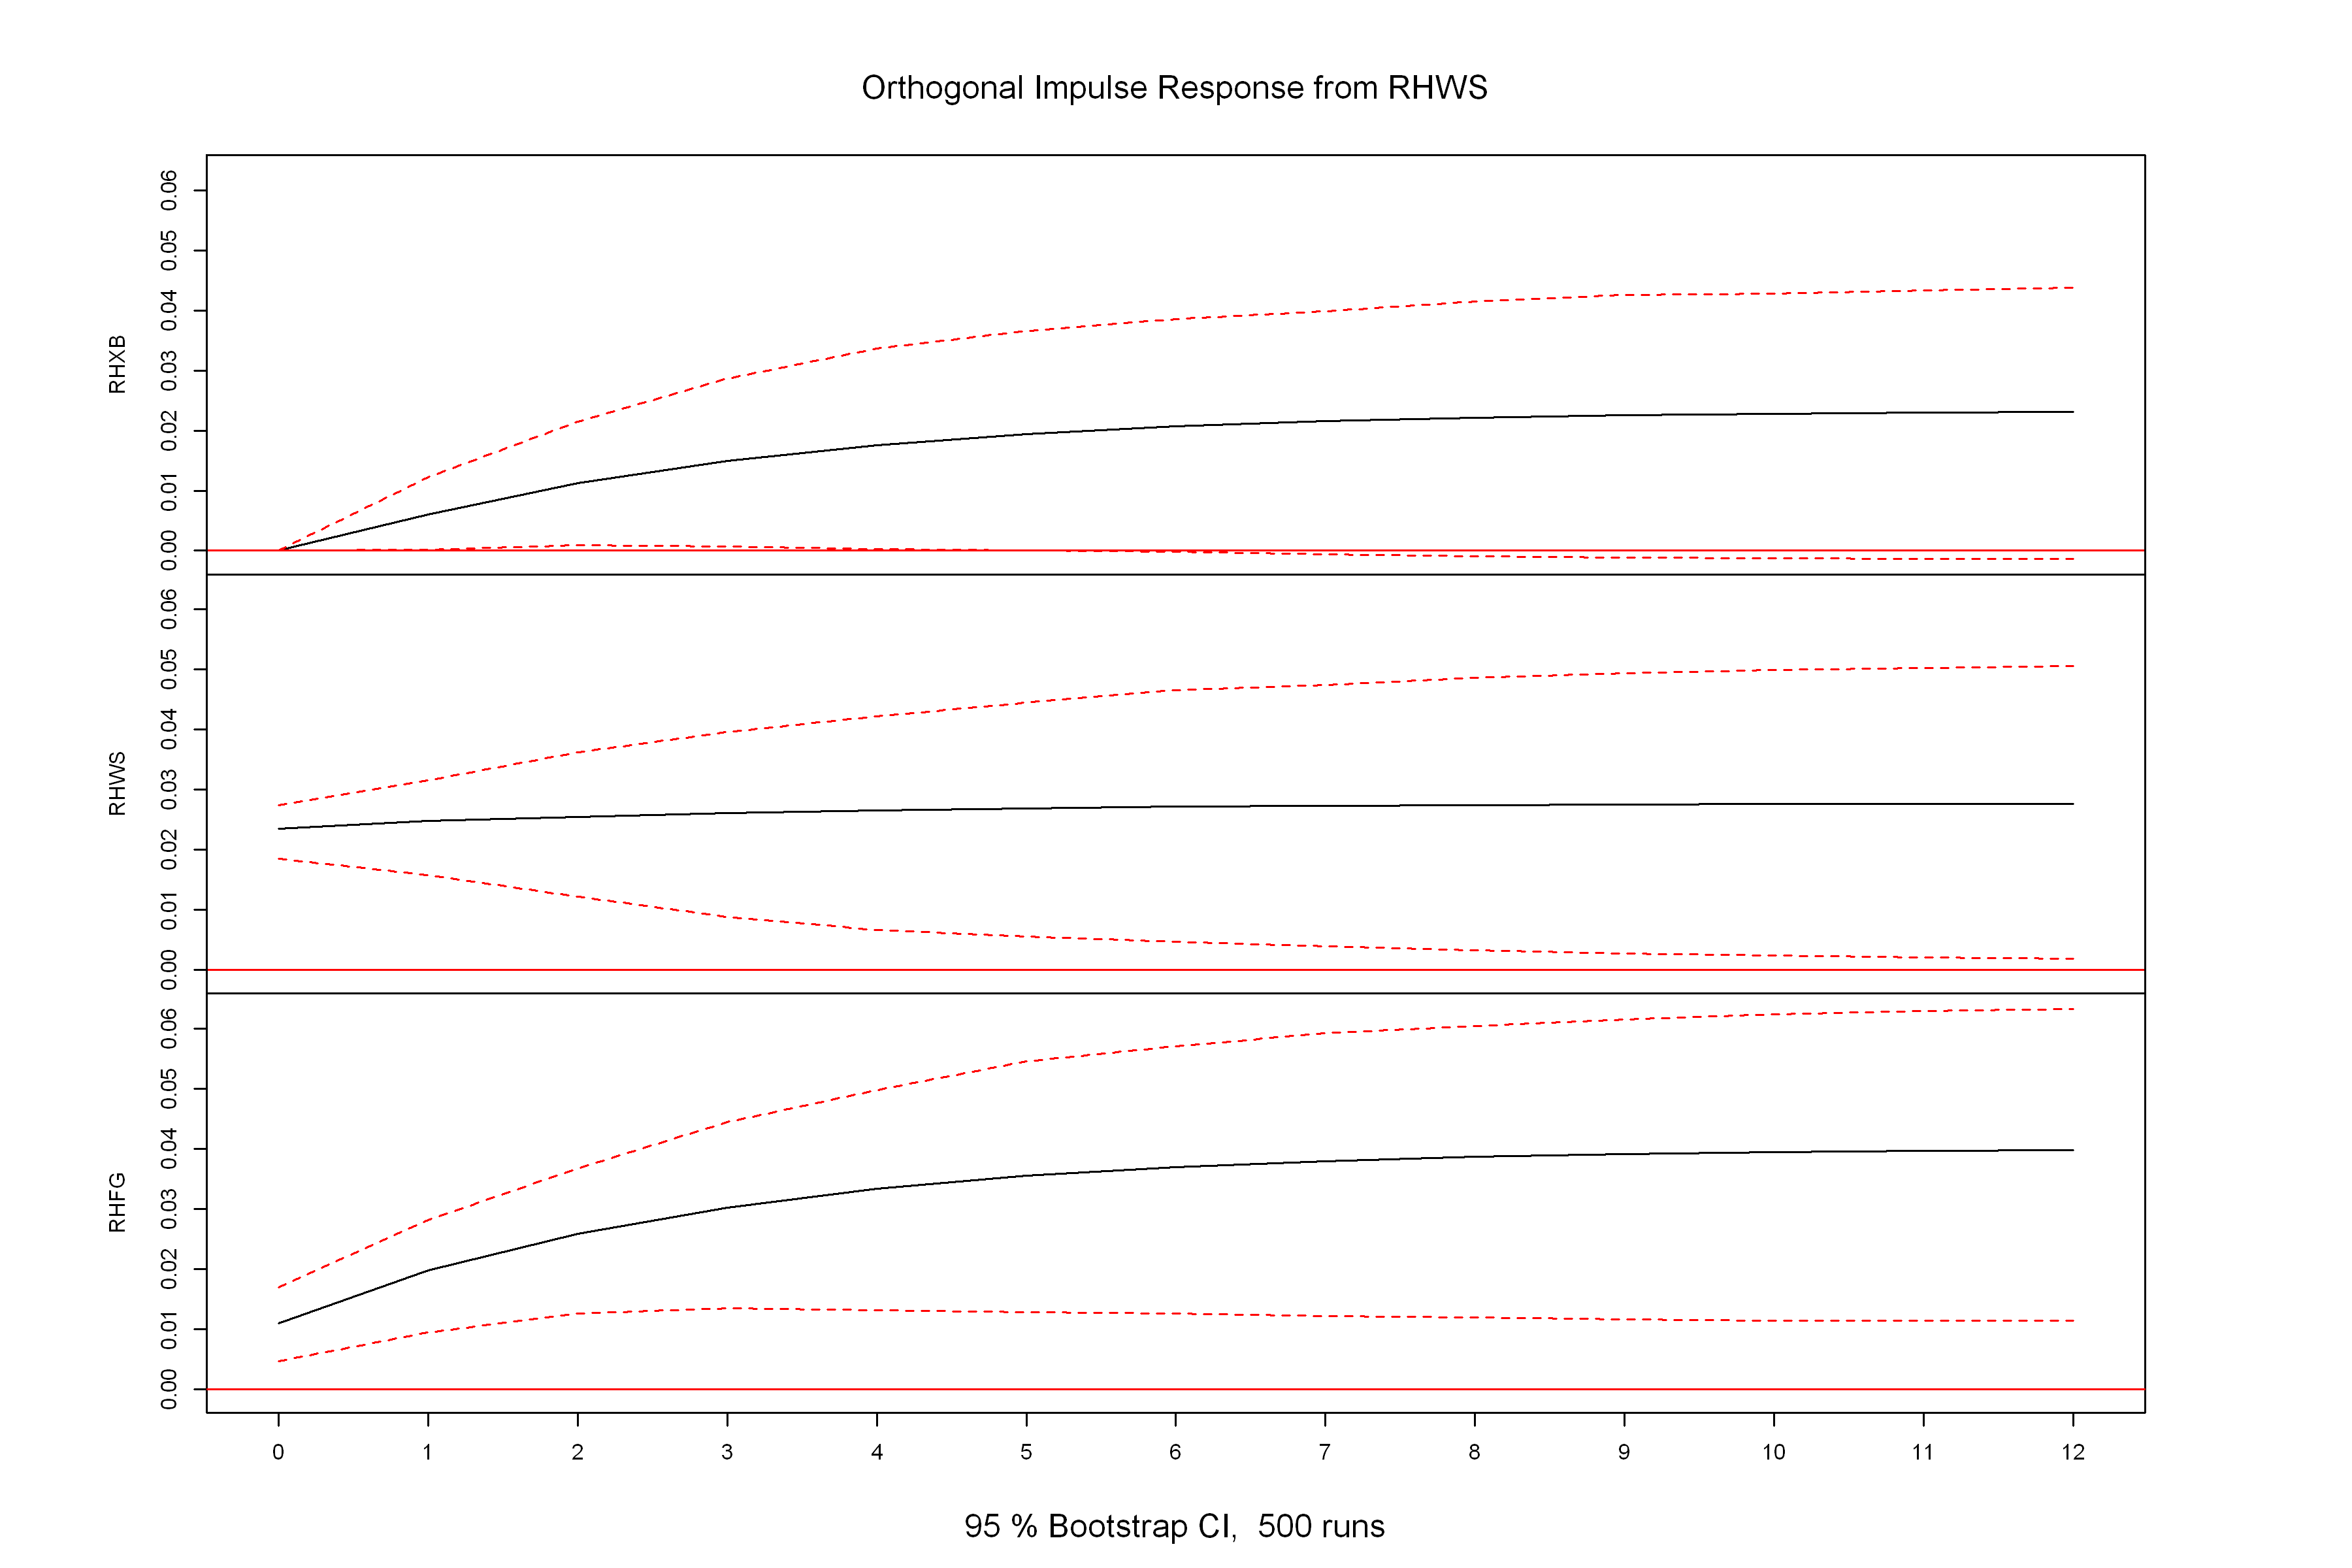

In [140]:
ir = irf(var, n.ahead = 12, impulse = "RHWS",
         ortho = TRUE, runs = 500)

# Plot
plot(ir)

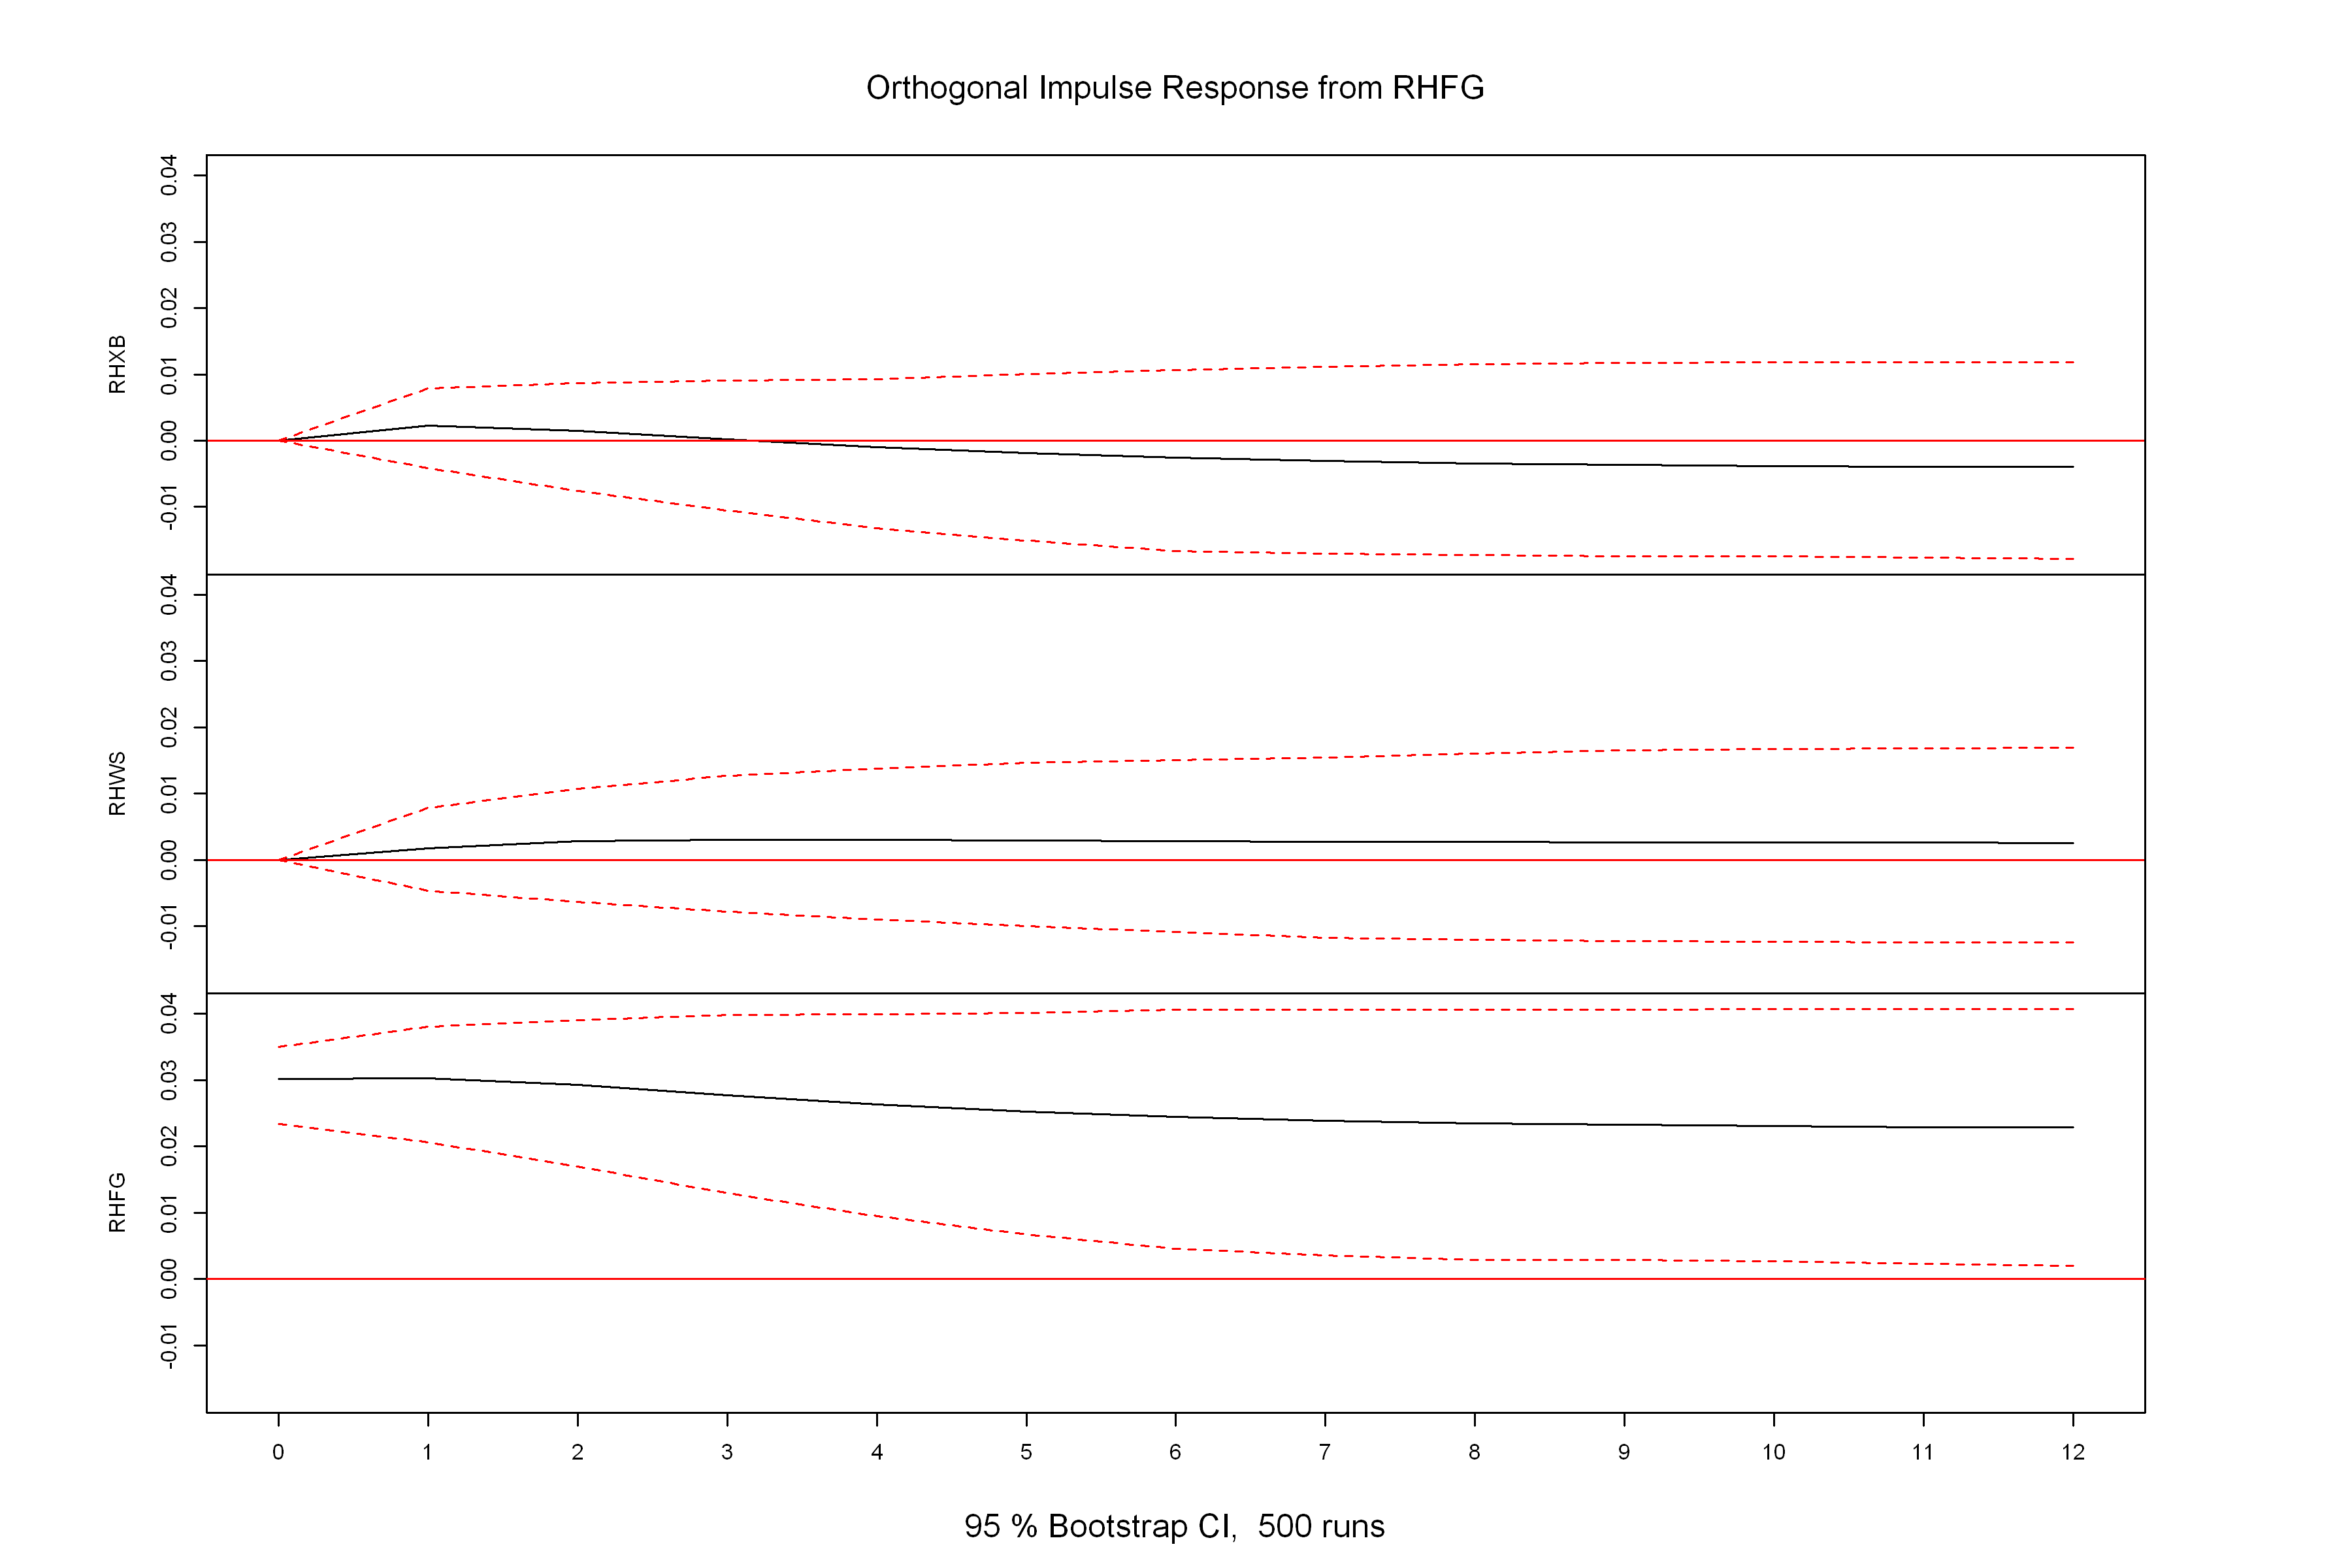

In [142]:
ir = irf(var, n.ahead = 12, impulse = "RHFG",
         ortho = TRUE, runs = 500)

# Plot
plot(ir)

[1] -2875.73

[1] -2869.838

[1] -2872.089

In [27]:
summary(rank.test(c2))

r,trace,trace_pval,trace_pval_T,eigen,eigen_pval
<int>,<dbl>,<chr>,<chr>,<dbl>,<chr>
0,44.347747,0.003244,0.003624,24.289778,0.02330
1,20.057969,0.051781,0.054097,14.053213,0.09559
2,6.004756,0.196979,< 0.001,6.004756,0.19665


In [30]:
vecm = VECM(x$endo, r = 1, lag = 1, estim = "ML", 
            LRinclude = 'const', 
            exogen = x$exo
           )

var_urca = tsDyn:::vec2var.tsDyn(vecm)

In [35]:
# str(var_urca)

### Deterministics
- Case 1 include = 'none'
- Case 2 LRinclude = 'const'
- Case 3 include = 'const', thus no need for parameters
- Case 4 LRinclude = 'trend'
- Case 5 include = 'both'

In [104]:
n_lag = 2

c2 = VECM(x$endo, lag = n_lag, estim = "ML", 
          LRinclude = 'const',
          exogen = x$exo)

c3 = VECM(x$endo, lag = n_lag, estim = "ML", 
          include = 'const', 
          exogen = x$exo)

c4 = VECM(x$endo, lag = n_lag, estim = "ML", 
          LRinclude = 'trend',
          exogen = x$exo)

c5 = VECM(x$endo, lag = n_lag, estim = "ML", 
          include = 'both', 
          exogen = x$exo)

In [105]:
AIC(c2)
AIC(c3)
AIC(c4)
AIC(c5)

[1] -3248.725

[1] -3243.019

[1] -3247.866

[1] -3242.629

In [106]:
summary(rank.test(c2))

r,trace,trace_pval,trace_pval_T,eigen,eigen_pval
<int>,<dbl>,<chr>,<chr>,<dbl>,<chr>
0,40.342906,0.0114,0.0126,24.588810,0.02082
1,15.754096,0.1897,0.1951,12.529410,0.16163
2,3.224686,0.5496,<0.001,3.224686,0.54849


## Estimation

In [149]:
vecm = VECM(x$endo[, c(1,2,3)], r = 1, lag = 2, estim = "ML", 
            include = 'const', 
            exogen = x$exo
           )

var_urca = tsDyn:::vec2var.tsDyn(vecm)

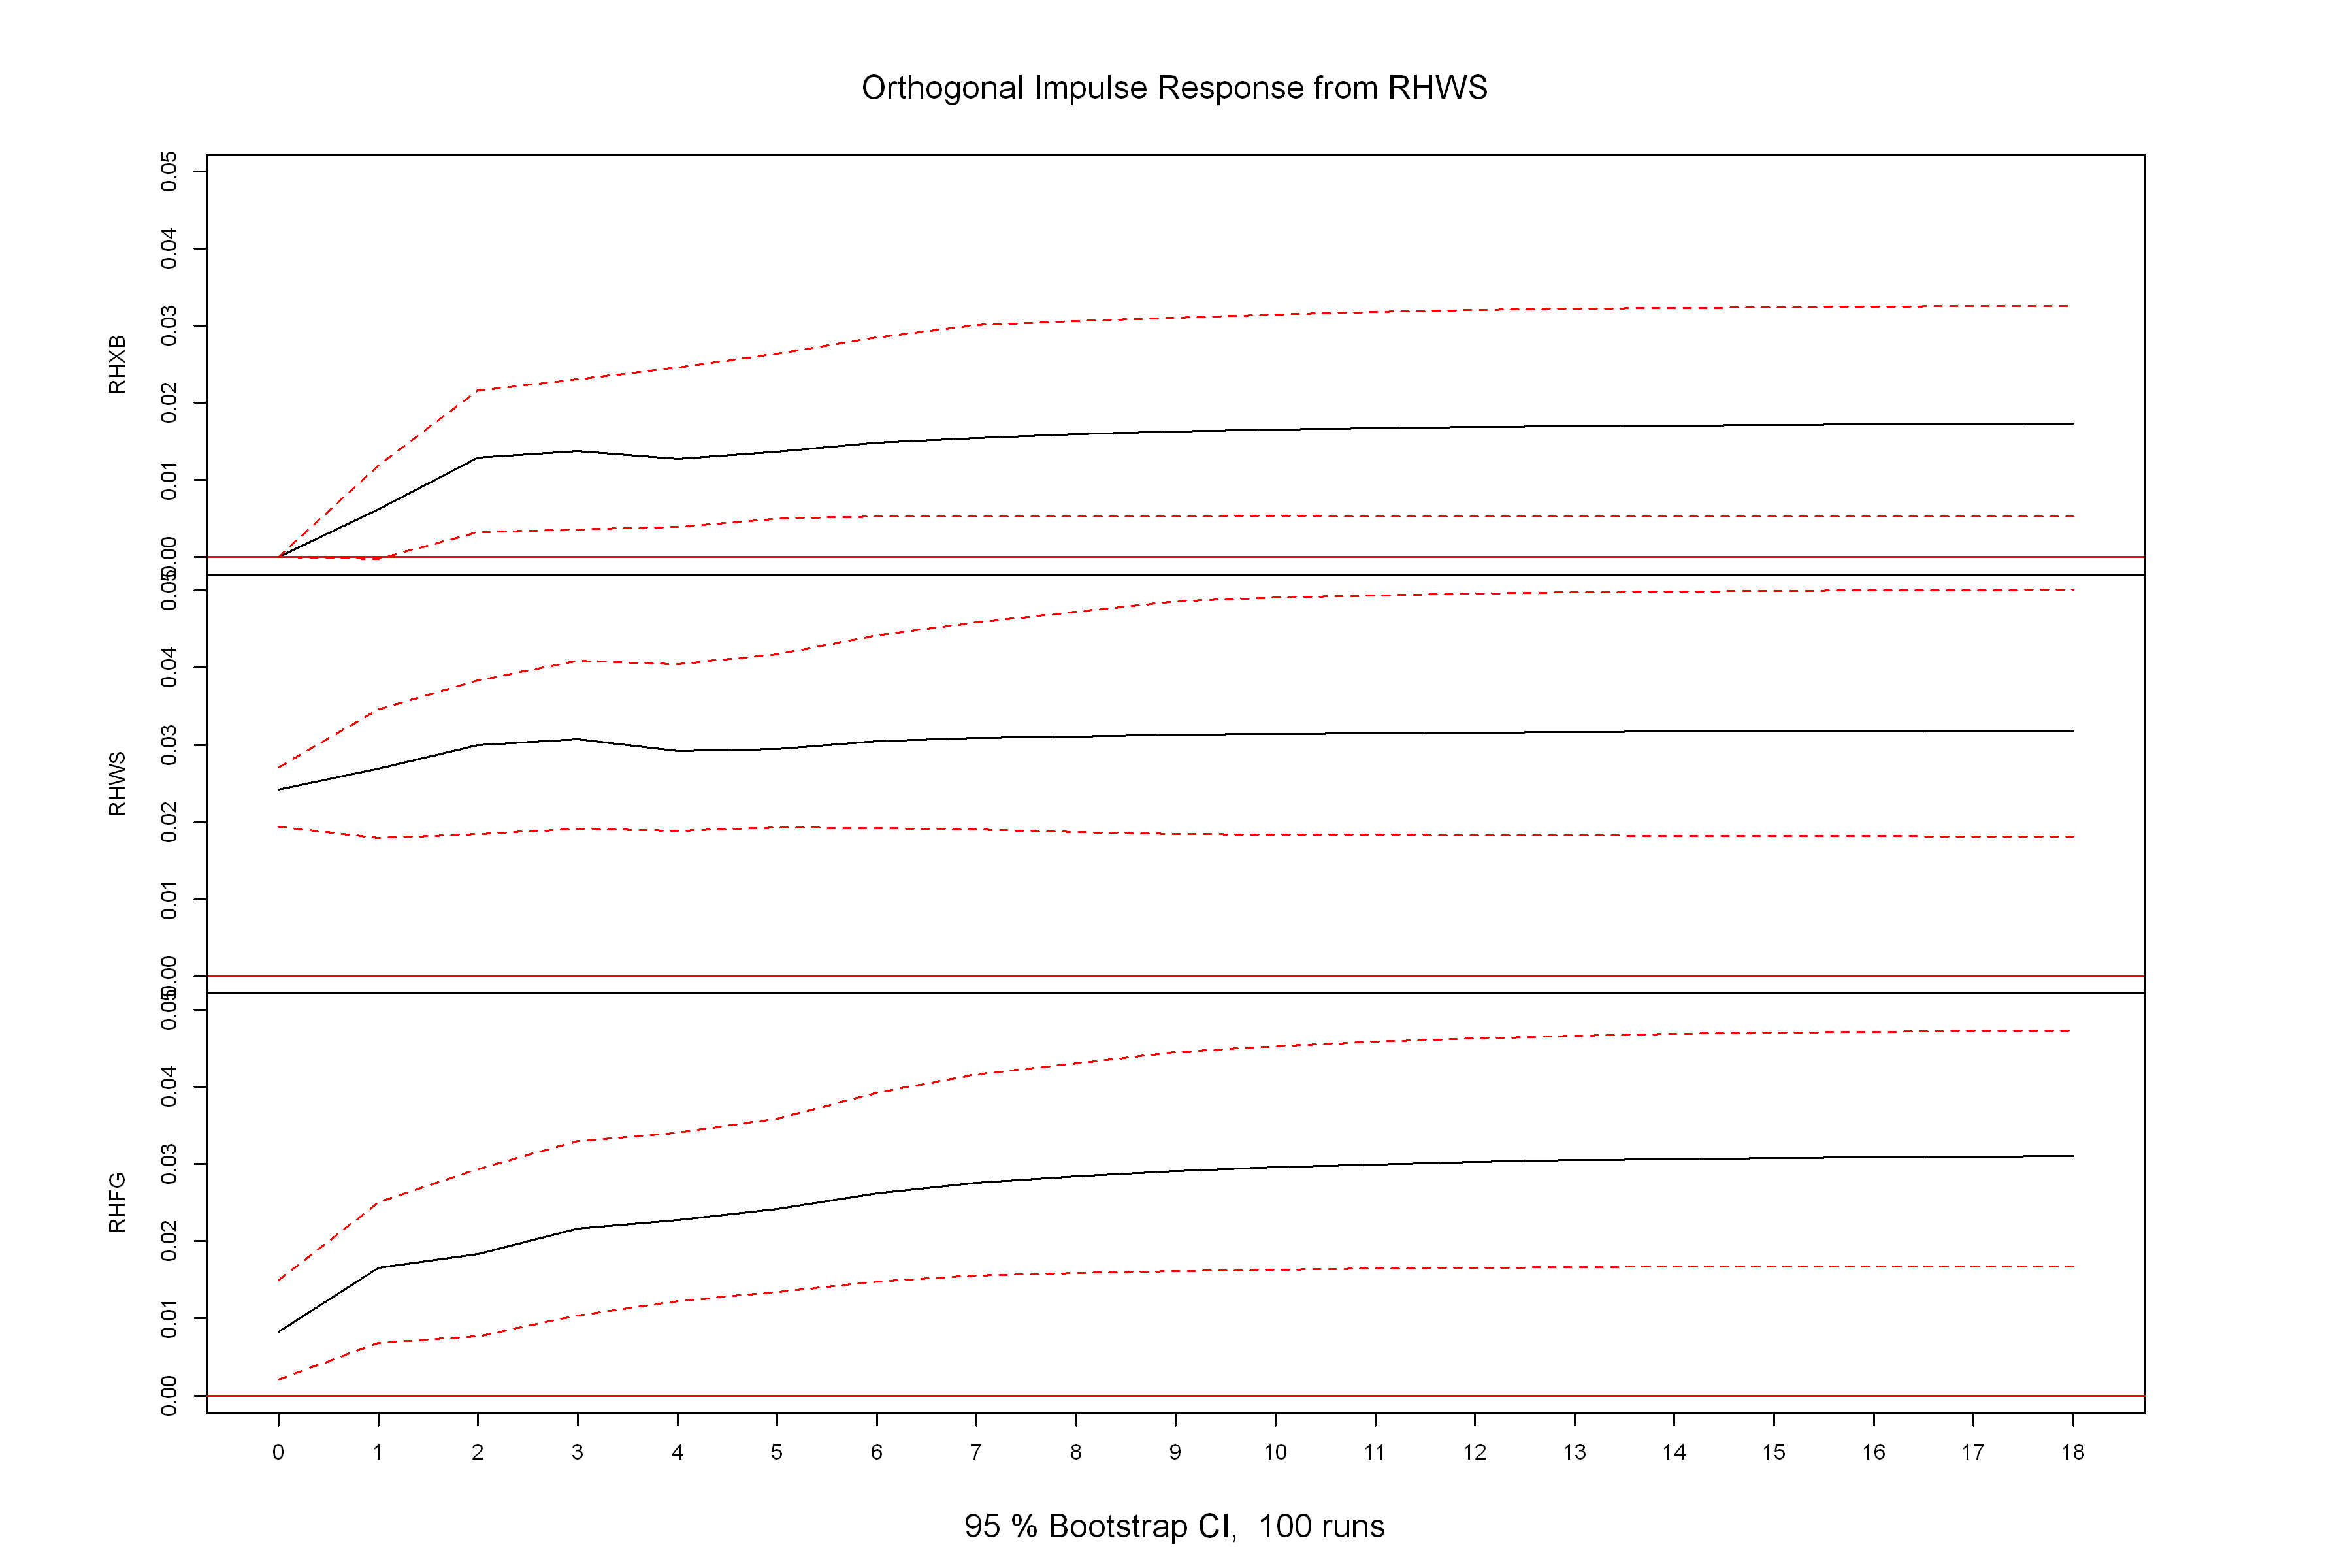

In [150]:
plot(irf(vecm, impulse = 'RHWS', n.ahead = 18, ortho = TRUE))

## Test

In [111]:
serial.test(var_urca)$serial
arch.test(var_urca)$arch.mul
normality.test(var_urca)$jb.mul$JB


	Portmanteau Test (asymptotic)

data:  Residuals of VAR object var_urca
Chi-squared = 107.5, df = 102, p-value = 0.3354



	ARCH (multivariate)

data:  Residuals of VAR object var_urca
Chi-squared = 284.73, df = 180, p-value = 1.05e-06



	JB-Test (multivariate)

data:  Residuals of VAR object var_urca
Chi-squared = 5793.4, df = 6, p-value < 2.2e-16


## Granger Causality

In [112]:
summary(vecm)

Warning message in if (class(x) == "numeric") return(noquote(r)):
"the condition has length > 1 and only the first element will be used"
Warning message in if (class(x) == "matrix") return(matrix(noquote(r), ncol = ncol(x), :
"the condition has length > 1 and only the first element will be used"
Warning message in if (class(x) == "numeric") return(noquote(r)):
"the condition has length > 1 and only the first element will be used"
Warning message in if (class(x) == "matrix") return(matrix(noquote(r), ncol = ncol(x), :
"the condition has length > 1 and only the first element will be used"


#############
###Model VECM 
#############
Full sample size: 159 	End sample size: 154
Number of variables: 3 	Number of estimated slope parameters 45
AIC -3180.766 	BIC -3038.029 	SSR 0.7328509
Cointegrating vector (estimated by ML):
   RHXB      RHWS      RHFG      const
r1    1 -1.891414 0.9962984 -0.3842044


              ECT                 RHXB -1            RHWS -1           
Equation RHXB -0.0526(0.0453)     0.0208(0.1562)     0.1470(0.1472)    
Equation RHWS 0.0295(0.0510)      0.1224(0.1760)     0.1515(0.1658)    
Equation RHFG -0.1161(0.0498)*    0.1781(0.1720)     0.1726(0.1621)    
              RHFG -1            RHXB -2             RHWS -2            
Equation RHXB 0.1031(0.1057)     -0.4696(0.1565)**   0.1087(0.1474)     
Equation RHWS 0.0515(0.1190)     -0.4088(0.1763)*    0.0078(0.1660)     
Equation RHFG 0.0858(0.1164)     -0.1771(0.1723)     -0.1717(0.1623)    
              RHFG -2            RHXB -3            RHWS -3            
Equation RHXB 0.2174(0.1032)*    

In [70]:
vecm <- ca.jo(x$endo, type = "trace", 
    ecdet = "trend", K = 3, spec = 'transitory', dumvar = x$exo)
vecm.r1 <- cajorls(vecm, r = 1)

alpha <- coef(vecm.r1$rlm)[1, ]
beta <- vecm.r1$beta
resids <- resid(vecm.r1$rlm)
N <- nrow(resids)
sigma <- crossprod(resids)/N

alpha.se <- sqrt(solve(crossprod(cbind(vecm@ZK %*% beta, 
    vecm@Z1)))[1, 1] * diag(sigma))
alpha.t <- alpha/alpha.se

beta.se <- sqrt(diag(kronecker(solve(crossprod(vecm@RK[, 
    -1])), solve(t(alpha) %*% solve(sigma) %*% alpha))))
beta.t <- c(NA, beta[-1]/beta.se)

## Weakly Exogenious

In [71]:
print(rbind(alpha, alpha.t))

             RHXB.d      RHWS.d      RHFG.d
alpha   -0.03128965 0.001021445 -0.09628629
alpha.t -1.39346452 0.040213803 -3.89906058


In [73]:
print(rbind(beta, beta.t))

Warning message in rbind(beta, beta.t):
"number of columns of result is not a multiple of vector length (arg 2)"


                 ect1
RHXB.l1   1.000000000
RHWS.l1  -3.415790358
RHFG.l1   2.502264156
trend.l1  0.001680115
beta.t             NA


In [74]:
beta.t

[1]        NA -6.522070  5.073072  2.339263

## Law of One Price

In [95]:
# str(H1)

In [158]:
H1 = ca.jo(
  x$endo, type = 'trace', ecdet = 'const', K = 4, 
  spec = 'transitory', dumvar = x$exo
)
H1 %>% summary()


###################### 
# Johansen-Procedure # 
###################### 

Test type: trace statistic , without linear trend and constant in cointegration 

Eigenvalues (lambda):
[1]  1.308277e-01  7.013795e-02  2.174216e-02 -1.108597e-17

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 2 |  3.41  7.52  9.24 12.97
r <= 1 | 14.68 17.85 19.96 24.60
r = 0  | 36.41 32.00 34.91 41.07

Eigenvectors, normalised to first column:
(These are the cointegration relations)

            RHXB.l1    RHWS.l1    RHFG.l1   constant
RHXB.l1   1.0000000  1.0000000  1.0000000  1.0000000
RHWS.l1  -2.3256193 -0.7780292 -0.3793525  0.9473931
RHFG.l1   1.5203133 -0.3666371 -0.4106013 -1.4678773
constant -0.8890456  1.0911372 -2.5864770 -5.7027467

Weights W:
(This is the loading matrix)

            RHXB.l1    RHWS.l1     RHFG.l1      constant
RHXB.d -0.049649264 0.08952128 -0.10678889 -2.245018e-14
RHWS.d -0.003523791 0.22732282 -0.08951172 -1.343448e-14
RHFG.d -0.108

In [152]:
vecm_urca = cajorls(H1, r = 1)
vecm_urca$rlm %>% summary()

Response RHXB.d :

Call:
lm(formula = RHXB.d ~ ect1 + d_foodcrisis + d_pledge + RHXB.dl1 + 
    RHWS.dl1 + RHFG.dl1 + RHXB.dl2 + RHWS.dl2 + RHFG.dl2 + RHXB.dl3 + 
    RHWS.dl3 + RHFG.dl3 - 1, data = data.mat)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.108183 -0.013088 -0.000196  0.013013  0.257620 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
ect1         -0.049649   0.031313  -1.586  0.11505    
d_foodcrisis  0.086109   0.020524   4.196 4.75e-05 ***
d_pledge      0.005121   0.008077   0.634  0.52712    
RHXB.dl1      0.030634   0.152001   0.202  0.84057    
RHWS.dl1      0.129398   0.142029   0.911  0.36379    
RHFG.dl1      0.096939   0.102162   0.949  0.34428    
RHXB.dl2     -0.417249   0.146308  -2.852  0.00499 ** 
RHWS.dl2      0.086241   0.140016   0.616  0.53892    
RHFG.dl2      0.209864   0.101841   2.061  0.04114 *  
RHXB.dl3      0.080457   0.146733   0.548  0.58433    
RHWS.dl3     -0.059678   0.140238  -0.426  0.67108    
RH

In [159]:
cajorls(H1, r = 1)

$rlm

Call:
lm(formula = substitute(form1), data = data.mat)

Coefficients:
              RHXB.d      RHWS.d      RHFG.d    
ect1          -0.0496493  -0.0035238  -0.1087569
d_foodcrisis   0.0861094   0.0473703   0.0821321
d_pledge       0.0051206   0.0006962   0.0144312
RHXB.dl1       0.0306336   0.1724815   0.1928380
RHWS.dl1       0.1293983   0.0867581   0.1291489
RHFG.dl1       0.0969390   0.0595671   0.1037158
RHXB.dl2      -0.4172490  -0.3558503  -0.1338998
RHWS.dl2       0.0862408  -0.0171562  -0.1972945
RHFG.dl2       0.2098642   0.1407989   0.0887958
RHXB.dl3       0.0804570   0.1306378   0.2344473
RHWS.dl3      -0.0596779  -0.0127115  -0.0152699
RHFG.dl3      -0.0509358  -0.0937191  -0.2142937


$beta
               ect1
RHXB.l1   1.0000000
RHWS.l1  -2.3256193
RHFG.l1   1.5203133
constant -0.8890456


In [174]:
x = vec2var(H1, r=2)

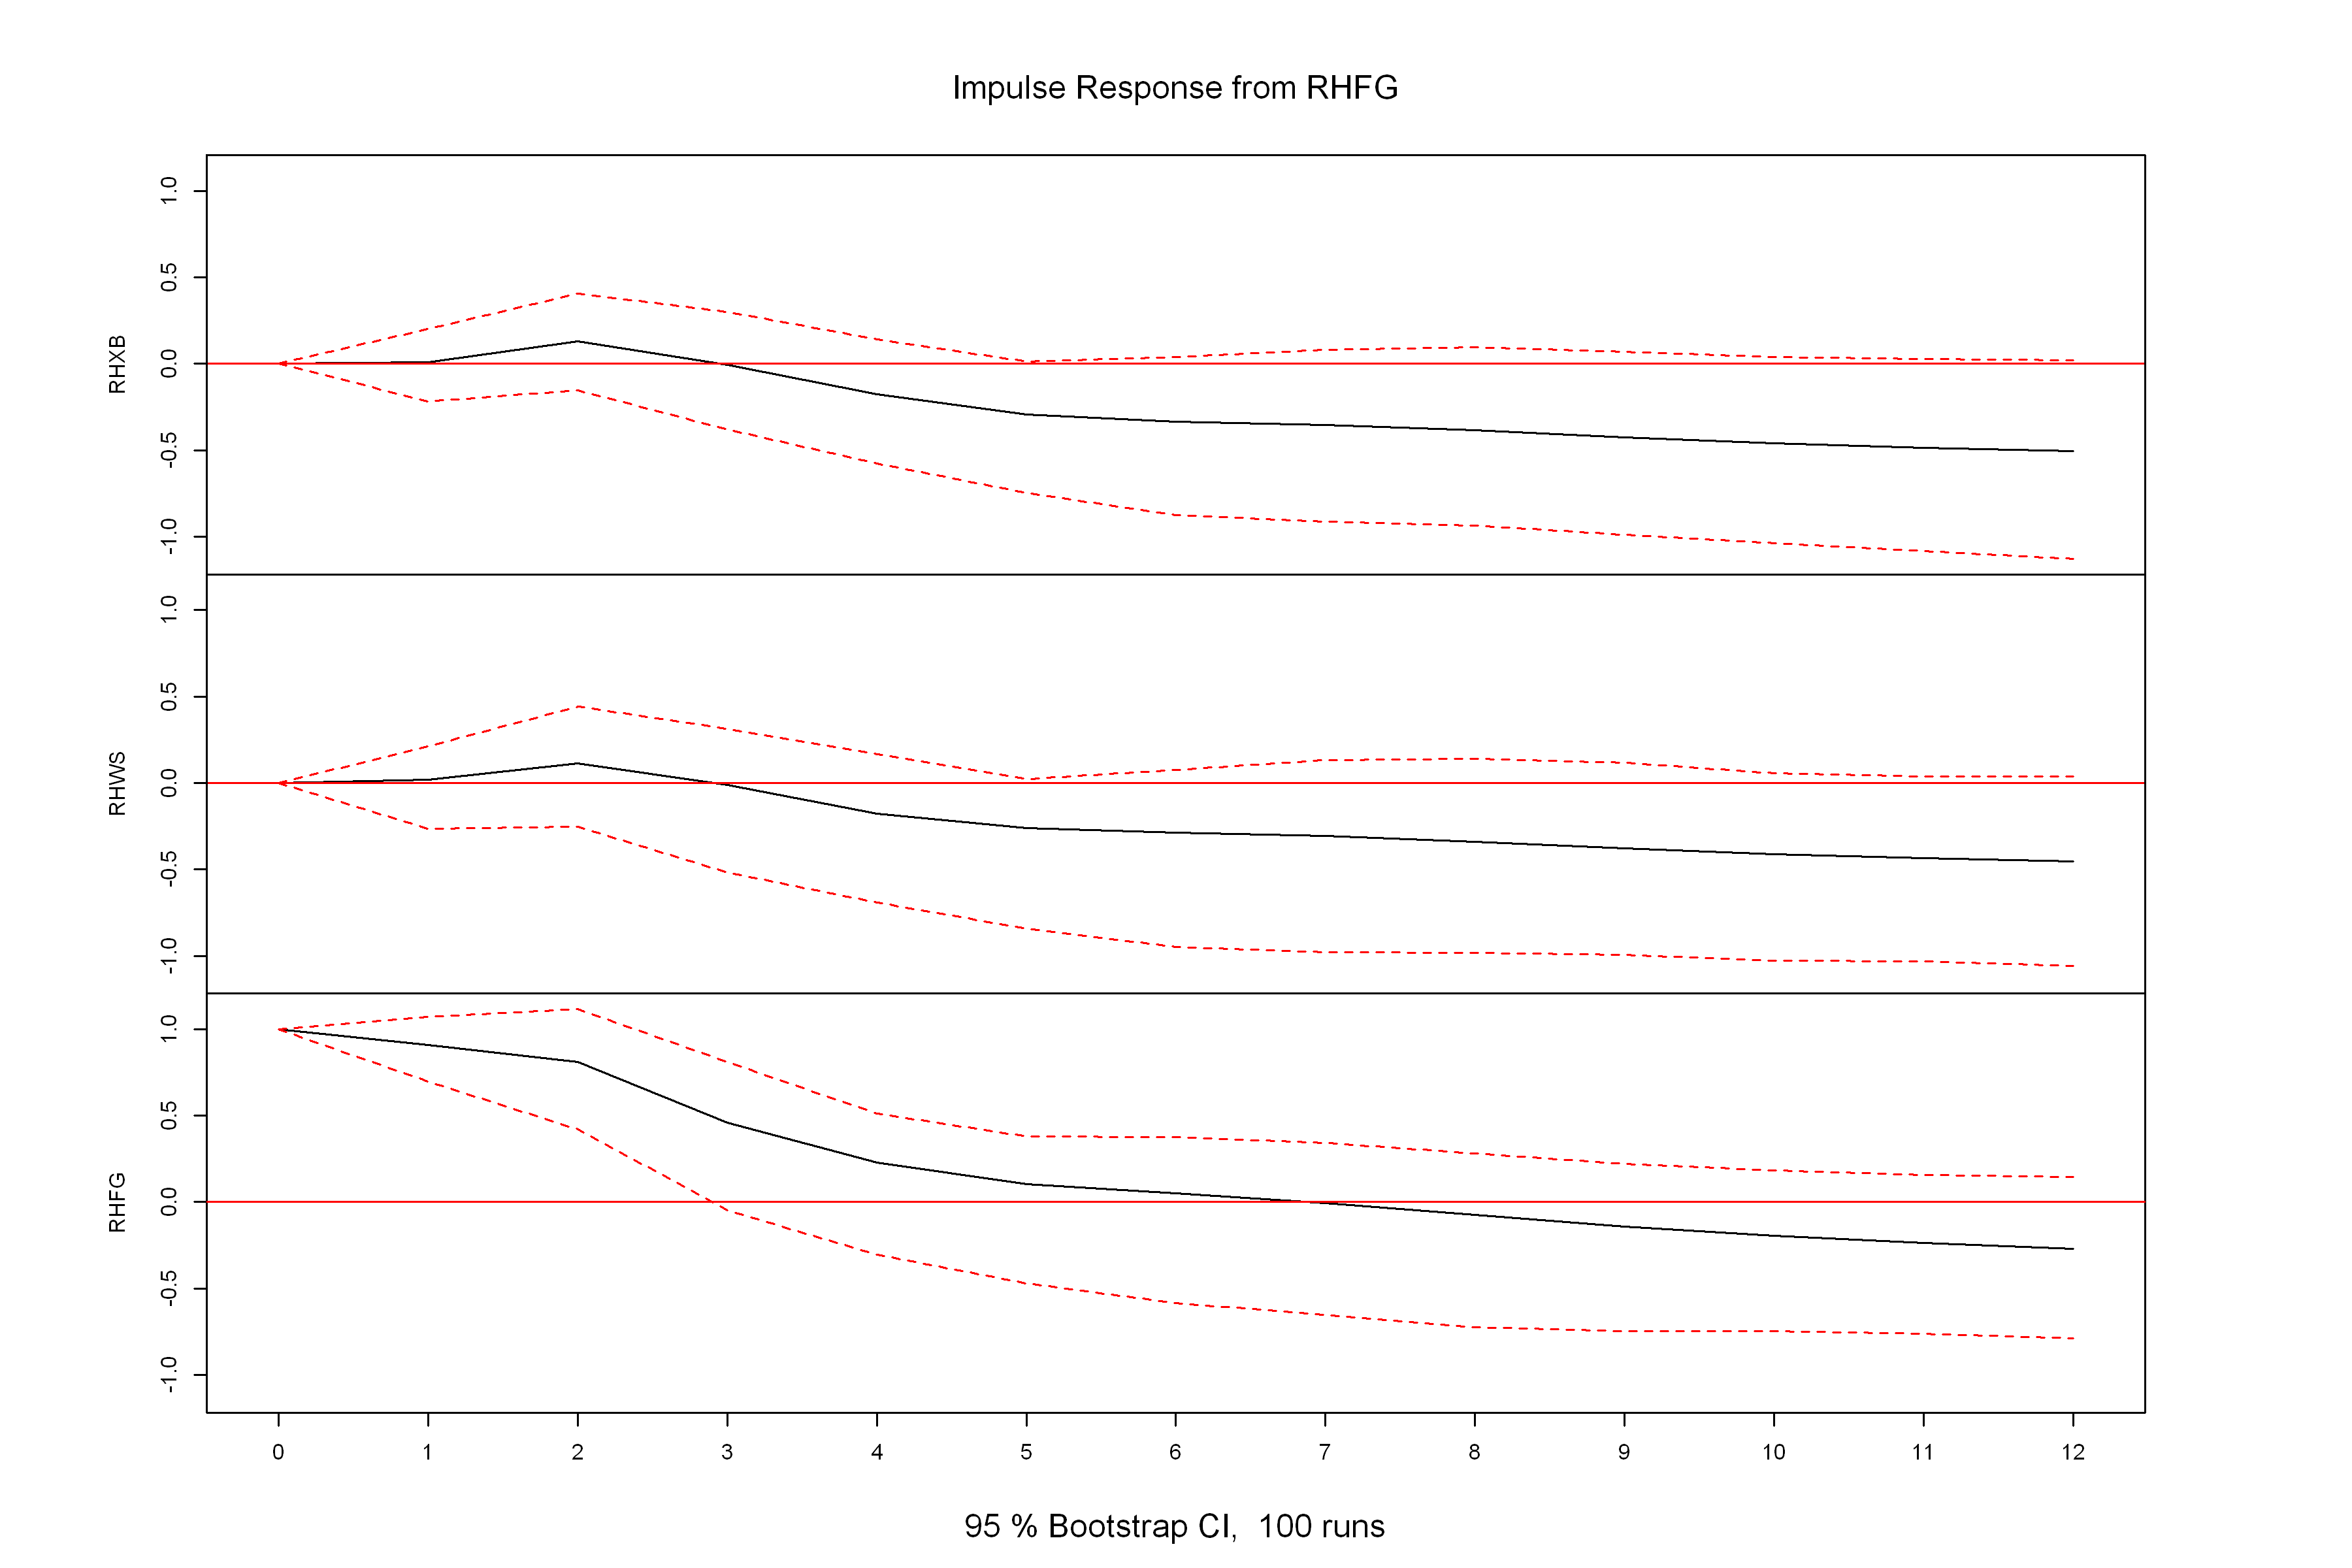

In [177]:
plot(irf(x, impulse = 'RHFG', n.ahead = 12, ortho = FALSE))

In [100]:
A1 <- matrix(c(0, 0, 0, 
               1, 0, 0, 
               0, 1, 0, 
               0, 0, 1), 
             nrow = 4, ncol = 3, byrow = TRUE)
print(A1)

     [,1] [,2] [,3]
[1,]    0    0    0
[2,]    1    0    0
[3,]    0    1    0
[4,]    0    0    1


In [96]:
## null hypothesis = two model are the same which implies the law of one price holds
## alternative hypothesis = two models are different which implies the law of one price does not hold

HA = matrix(c( 1,  0,  0,
               0,  1,  0,
              -1, -1,  0,
               0,  0,  1
             ), 
            ncol = 3, byrow = TRUE)

blrtest(z = H1, H = HA, r = 1) %>% summary()


###################### 
# Johansen-Procedure # 
###################### 

Estimation and testing under linear restrictions on beta 

The VECM has been estimated subject to: 
beta=H*phi and/or alpha=A*psi

     [,1] [,2] [,3]
[1,]    1    0    0
[2,]    0    1    0
[3,]   -1   -1    0
[4,]    0    0    1

Eigenvalues of restricted VAR (lambda):
[1] 0.1233 0.0501 0.0010

The value of the likelihood ratio test statistic:
1.34 distributed as chi square with 1 df.
The p-value of the test statistic is: 0.25 

Eigenvectors, normalised to first column
of the restricted VAR:

        [,1]    [,2]    [,3]
[1,]  1.0000  1.0000  1.0000
[2,] -2.0532 -0.5543 -3.8358
[3,]  1.0532 -0.4457  2.8358
[4,]  0.7346 -0.4543  0.7541

Weights W of the restricted VAR:

          [,1]    [,2]   [,3]
RHXB.d -0.0383 -0.0034 -1e-03
RHWS.d  0.0336  0.1299 -1e-03
RHFG.d -0.1031  0.1967 -6e-04


In [88]:
H1 = ca.jo(
  x$endo[, c(1,3)], type = 'trace', ecdet = 'trend', K = 4, 
  spec = 'transitory', dumvar = x$exo
)
H1 %>% summary()


###################### 
# Johansen-Procedure # 
###################### 

Test type: trace statistic , with linear trend in cointegration 

Eigenvalues (lambda):
[1]  9.910799e-02  2.496825e-02 -3.469447e-18

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 1 |  3.92 10.49 12.25 16.26
r = 0  | 20.10 22.76 25.32 30.45

Eigenvectors, normalised to first column:
(These are the cointegration relations)

               RHXB.l1       RHFG.l1   trend.l1
RHXB.l1   1.0000000000  1.0000000000  1.0000000
RHFG.l1  -1.2300350272 -0.6403357136 -0.6561566
trend.l1 -0.0002362253 -0.0008582273  0.0161795

Weights W:
(This is the loading matrix)

          RHXB.l1    RHFG.l1     trend.l1
RHXB.d 0.08334192 -0.0862289 1.282691e-15
RHFG.d 0.19919896 -0.0279089 6.390536e-15


In [89]:
vecm_urca = cajorls(H1, r = 1)
vecm_urca$rlm %>% summary()

Response RHXB.d :

Call:
lm(formula = RHXB.d ~ ect1 + constant + d_foodcrisis + d_pledge + 
    RHXB.dl1 + RHFG.dl1 + RHXB.dl2 + RHFG.dl2 + RHXB.dl3 + RHFG.dl3 - 
    1, data = data.mat)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.102754 -0.013385 -0.002384  0.012122  0.264173 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
ect1          0.083342   0.047648   1.749  0.08239 .  
constant      0.109607   0.062301   1.759  0.08063 .  
d_foodcrisis  0.087139   0.021216   4.107 6.67e-05 ***
d_pledge      0.008523   0.009553   0.892  0.37381    
RHXB.dl1      0.083631   0.116035   0.721  0.47223    
RHFG.dl1      0.170077   0.099818   1.704  0.09055 .  
RHXB.dl2     -0.375317   0.112917  -3.324  0.00112 ** 
RHFG.dl2      0.244409   0.098885   2.472  0.01461 *  
RHXB.dl3     -0.002575   0.109643  -0.023  0.98129    
RHFG.dl3     -0.050949   0.098228  -0.519  0.60478    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual st

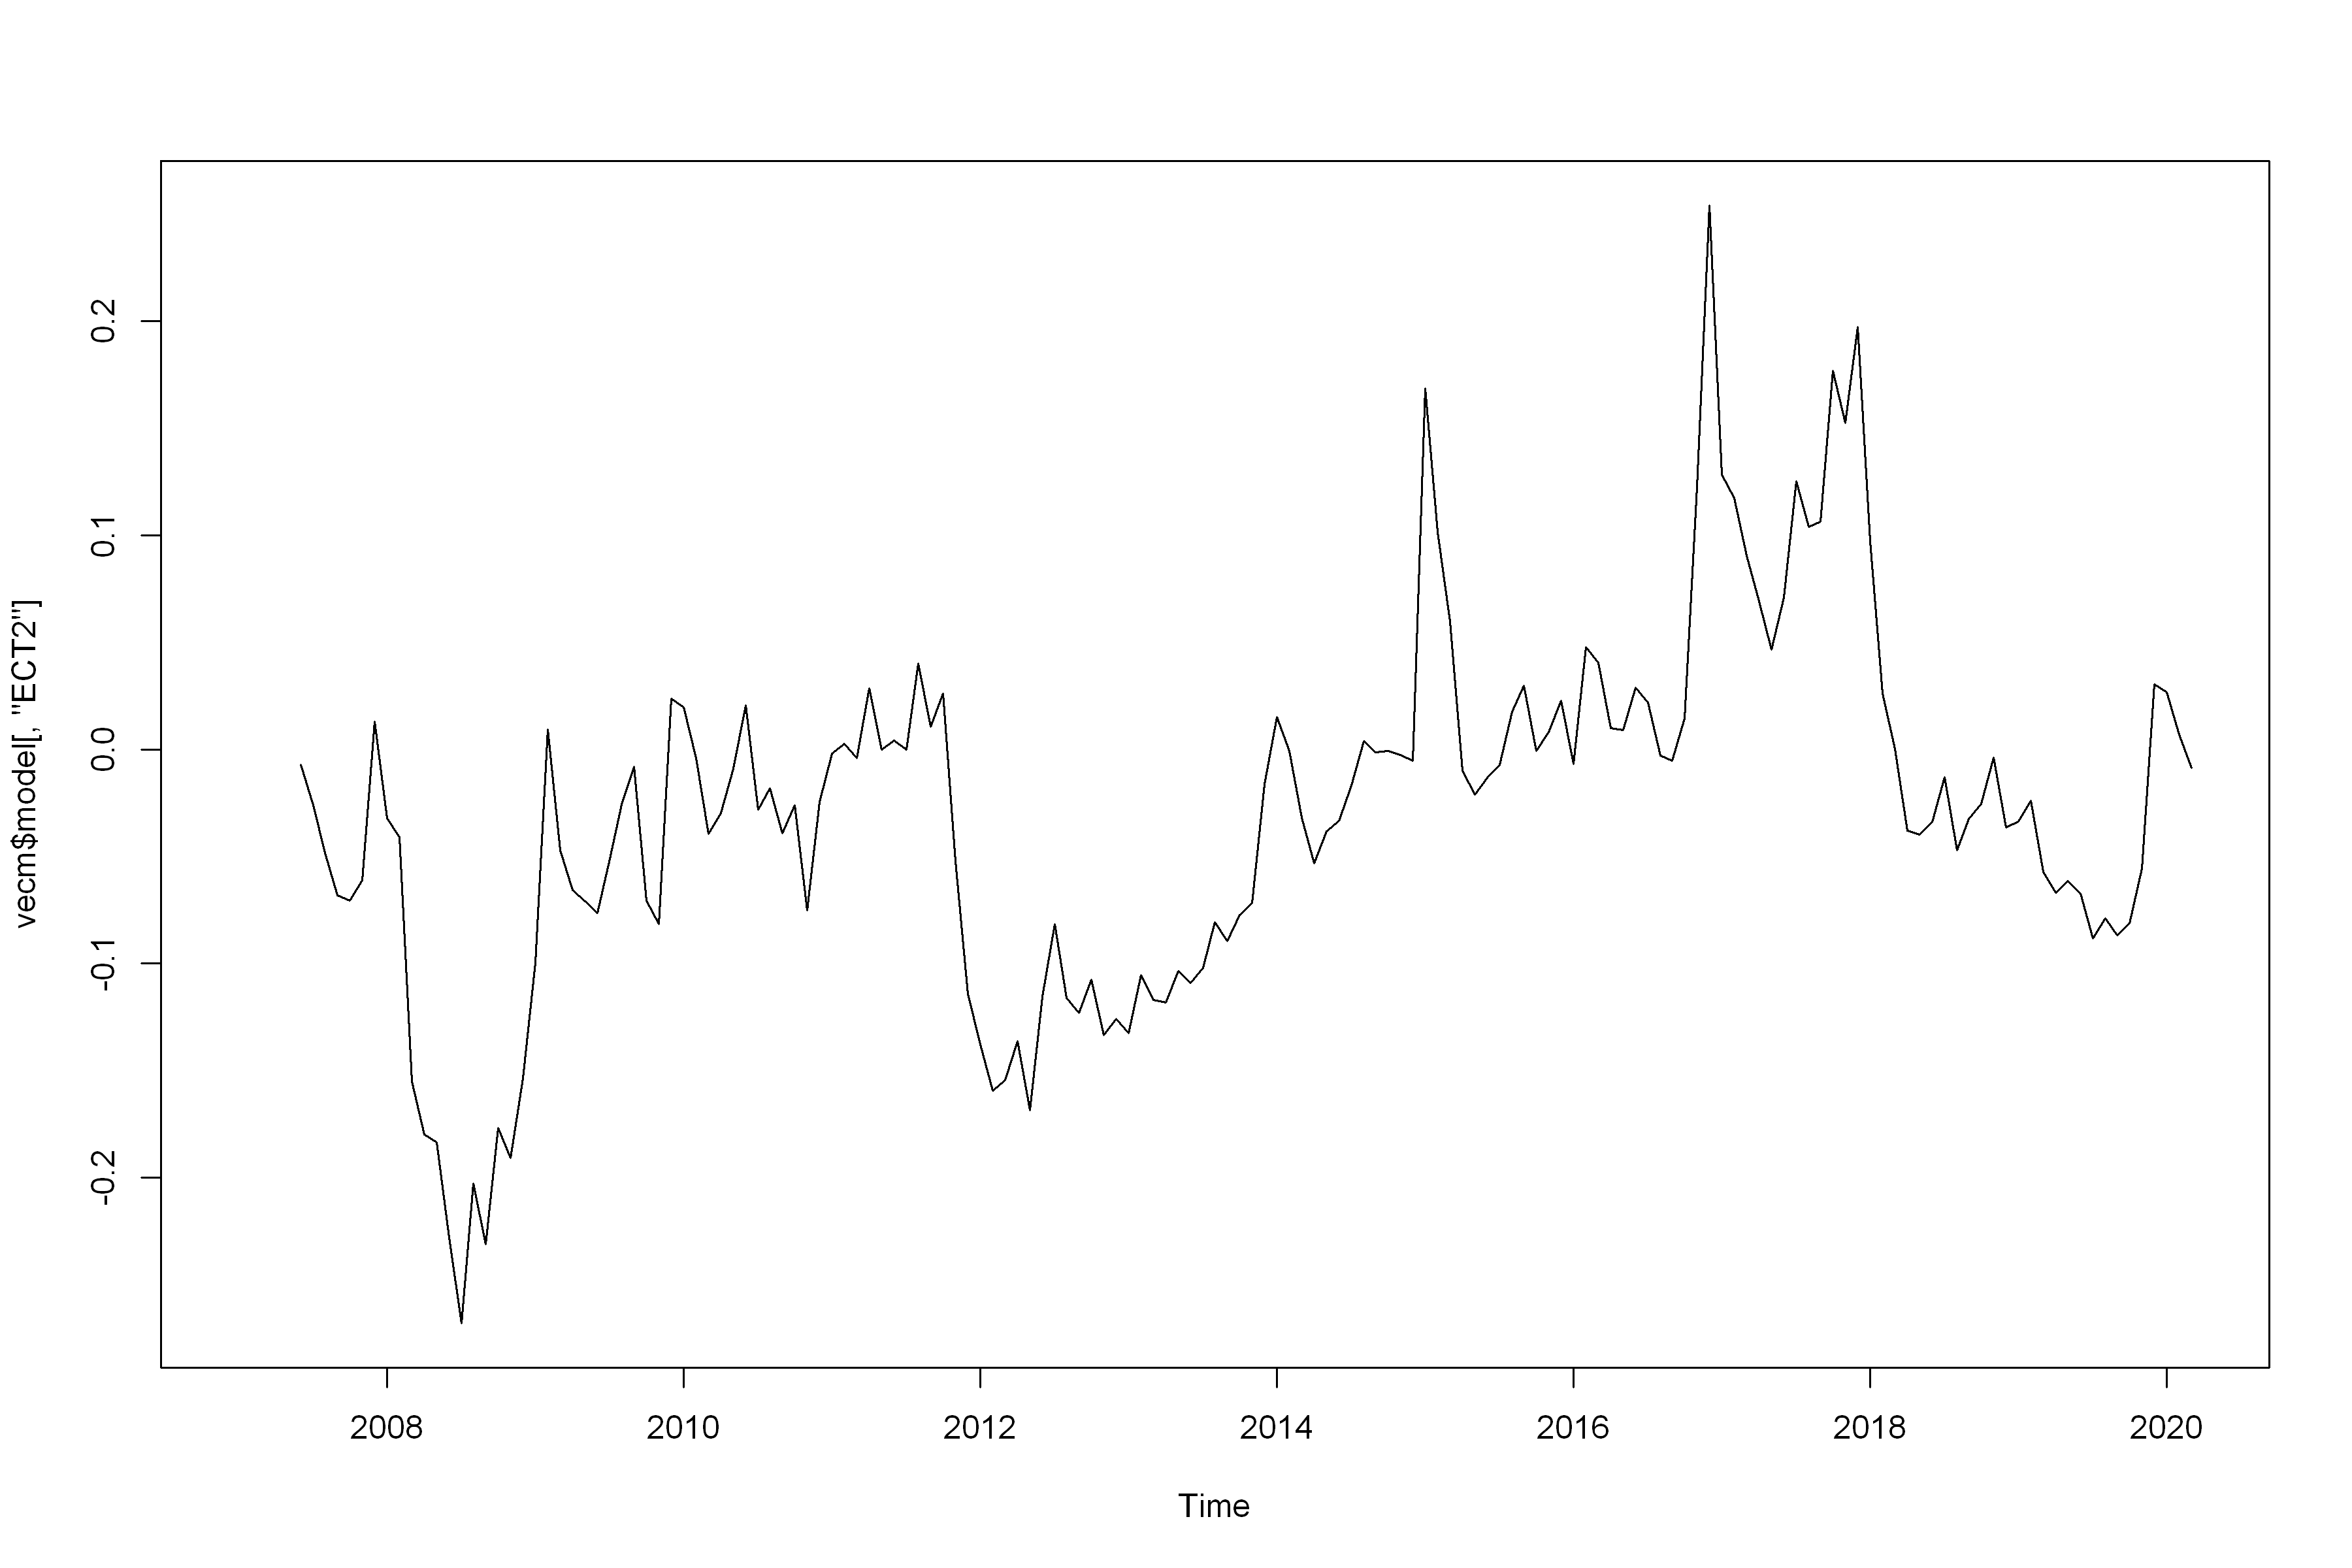

In [64]:
plot(vecm$model[, 'ECT2'])

In [113]:
# vecm$model

## IRF

In [ ]:
irf(x, impulse = NULL, response = NULL, n.ahead = 10,
ortho = TRUE, cumulative = FALSE, boot = TRUE, ci = 0.95,
runs = 100, seed = NULL, ...)

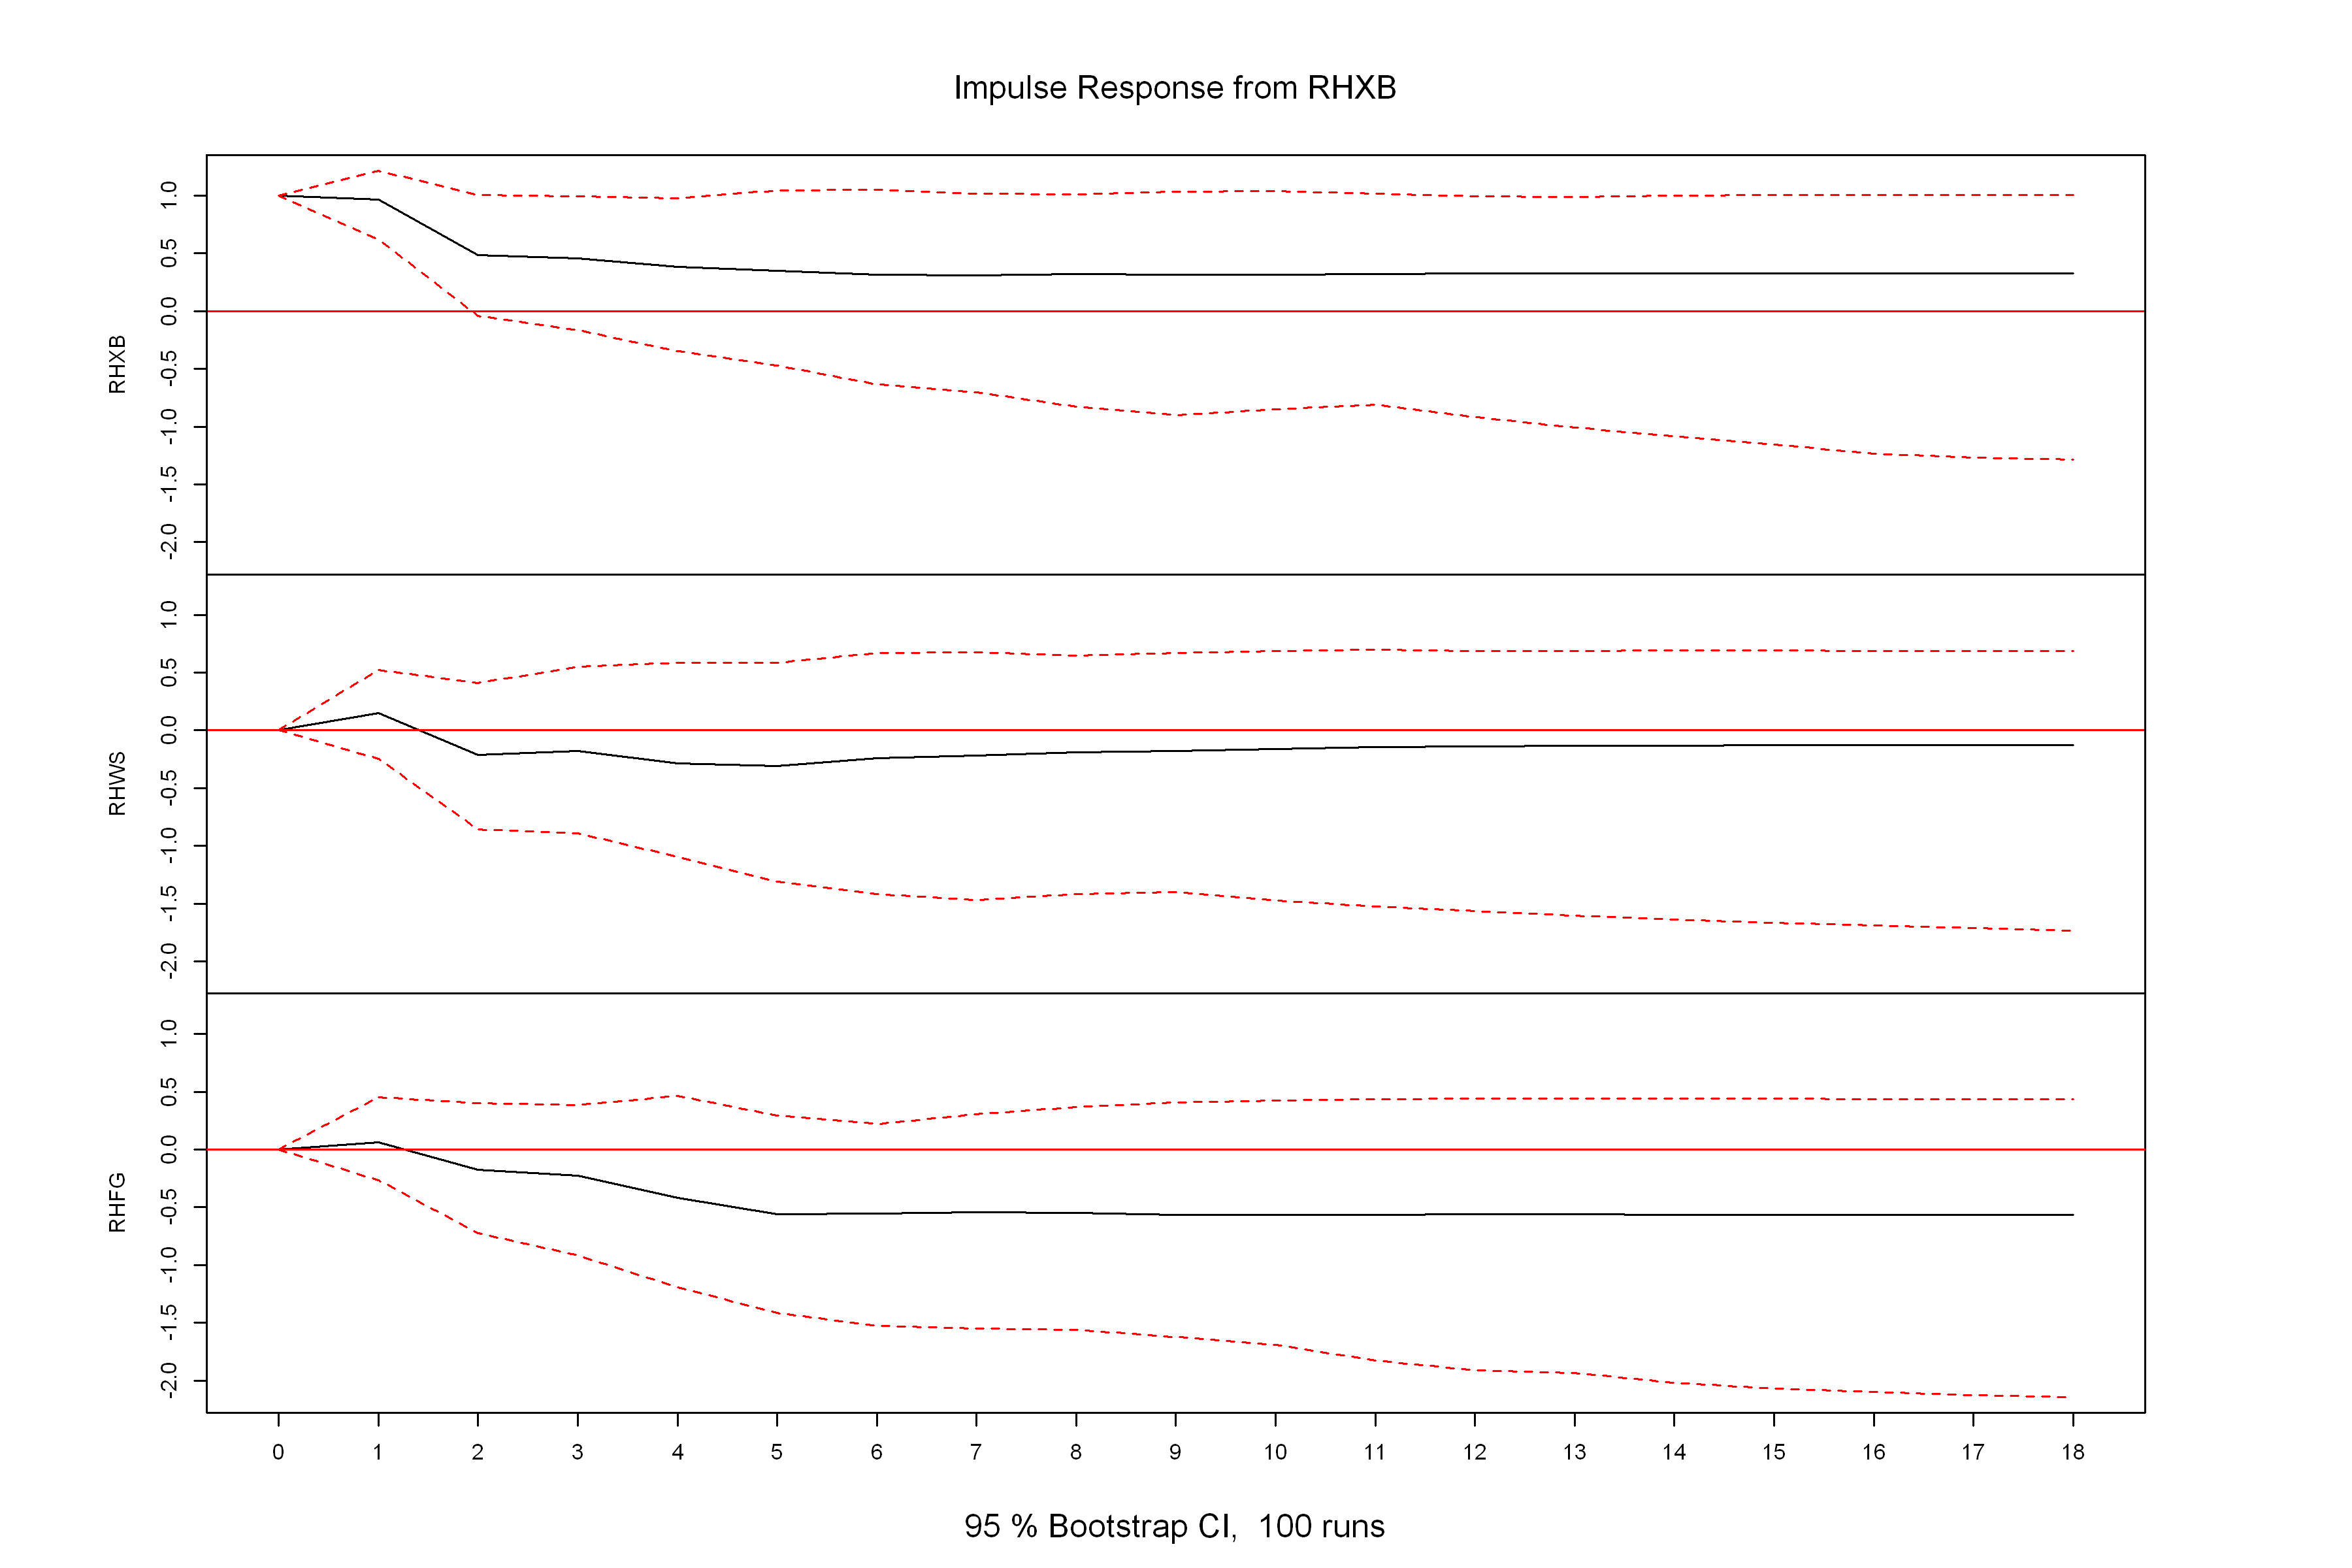

In [247]:
str(c3)

List of 18
 $ residuals     : num [1:157, 1:3] -0.03599 0.01196 -0.00372 0.00469 0.02721 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:3] "RWFG_0" "RWWS" "RWXB"
 $ coefficients  : num [1:3, 1:7] -0.422 -0.346 -0.169 1.654 1.356 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:3] "Equation RWFG_0" "Equation RWWS" "Equation RWXB"
  .. ..$ : chr [1:7] "ECT" "Intercept" "RWFG_0 -1" "RWWS -1" ...
 $ k             : int 3
 $ t             : num 157
 $ T             : int 159
 $ npar          : int 21
 $ nparB         : int 7
 $ type          : chr "linear"
 $ fitted.values : num [1:157, 1:3] 0.0333 -0.0171 -0.0136 -0.0106 -0.0119 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:3] "RWFG_0" "RWWS" "RWXB"
 $ model.x       : num [1:157, 1:7] 3.96 3.96 3.97 3.96 3.92 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:7] "" "" "" "" ...
 $ include       : chr "const"
 $ lag           : num 1
 $ model         : Ti

In [161]:
c4$coefficients

,ECT,Intercept,RHFG_0 -1,RHWS -1,RHXB -1,RHFG_0 -2,RHWS -2,RHXB -2,d_foodcrisis,d_pledge
Equation RHFG_0,-0.240933729,-0.080127847,0.16446004,0.07573424,0.137531796,0.1323859,-0.204979637,-0.1711400,0.08196492,0.012382399
Equation RHWS,0.002555926,0.002745416,0.06683901,0.08588520,0.150591369,0.1504473,0.002121193,-0.3686886,0.04468180,-0.002132509
Equation RHXB,-0.078294981,-0.025123612,0.11343095,0.14583794,-0.009347518,0.2045273,0.110944303,-0.4488585,0.08220030,0.001667096


In [163]:
c4$model.specific$beta

,r1
RHFG_0,1.000000000
RHWS,-1.365079842
RHXB,0.399638063
trend,0.000671438


In [ ]:
new_dates = seq(as.Date("2020-04-01"), length=20, by="month")
d_foodcrisis = xts(x=rep(0, 20), order.by = new_dates)
d_pledge = xts(x=rep(0, 20), order.by = new_dates)
new_exo = ts_c(d_foodcrisis, d_pledge) %>% ts_ts()

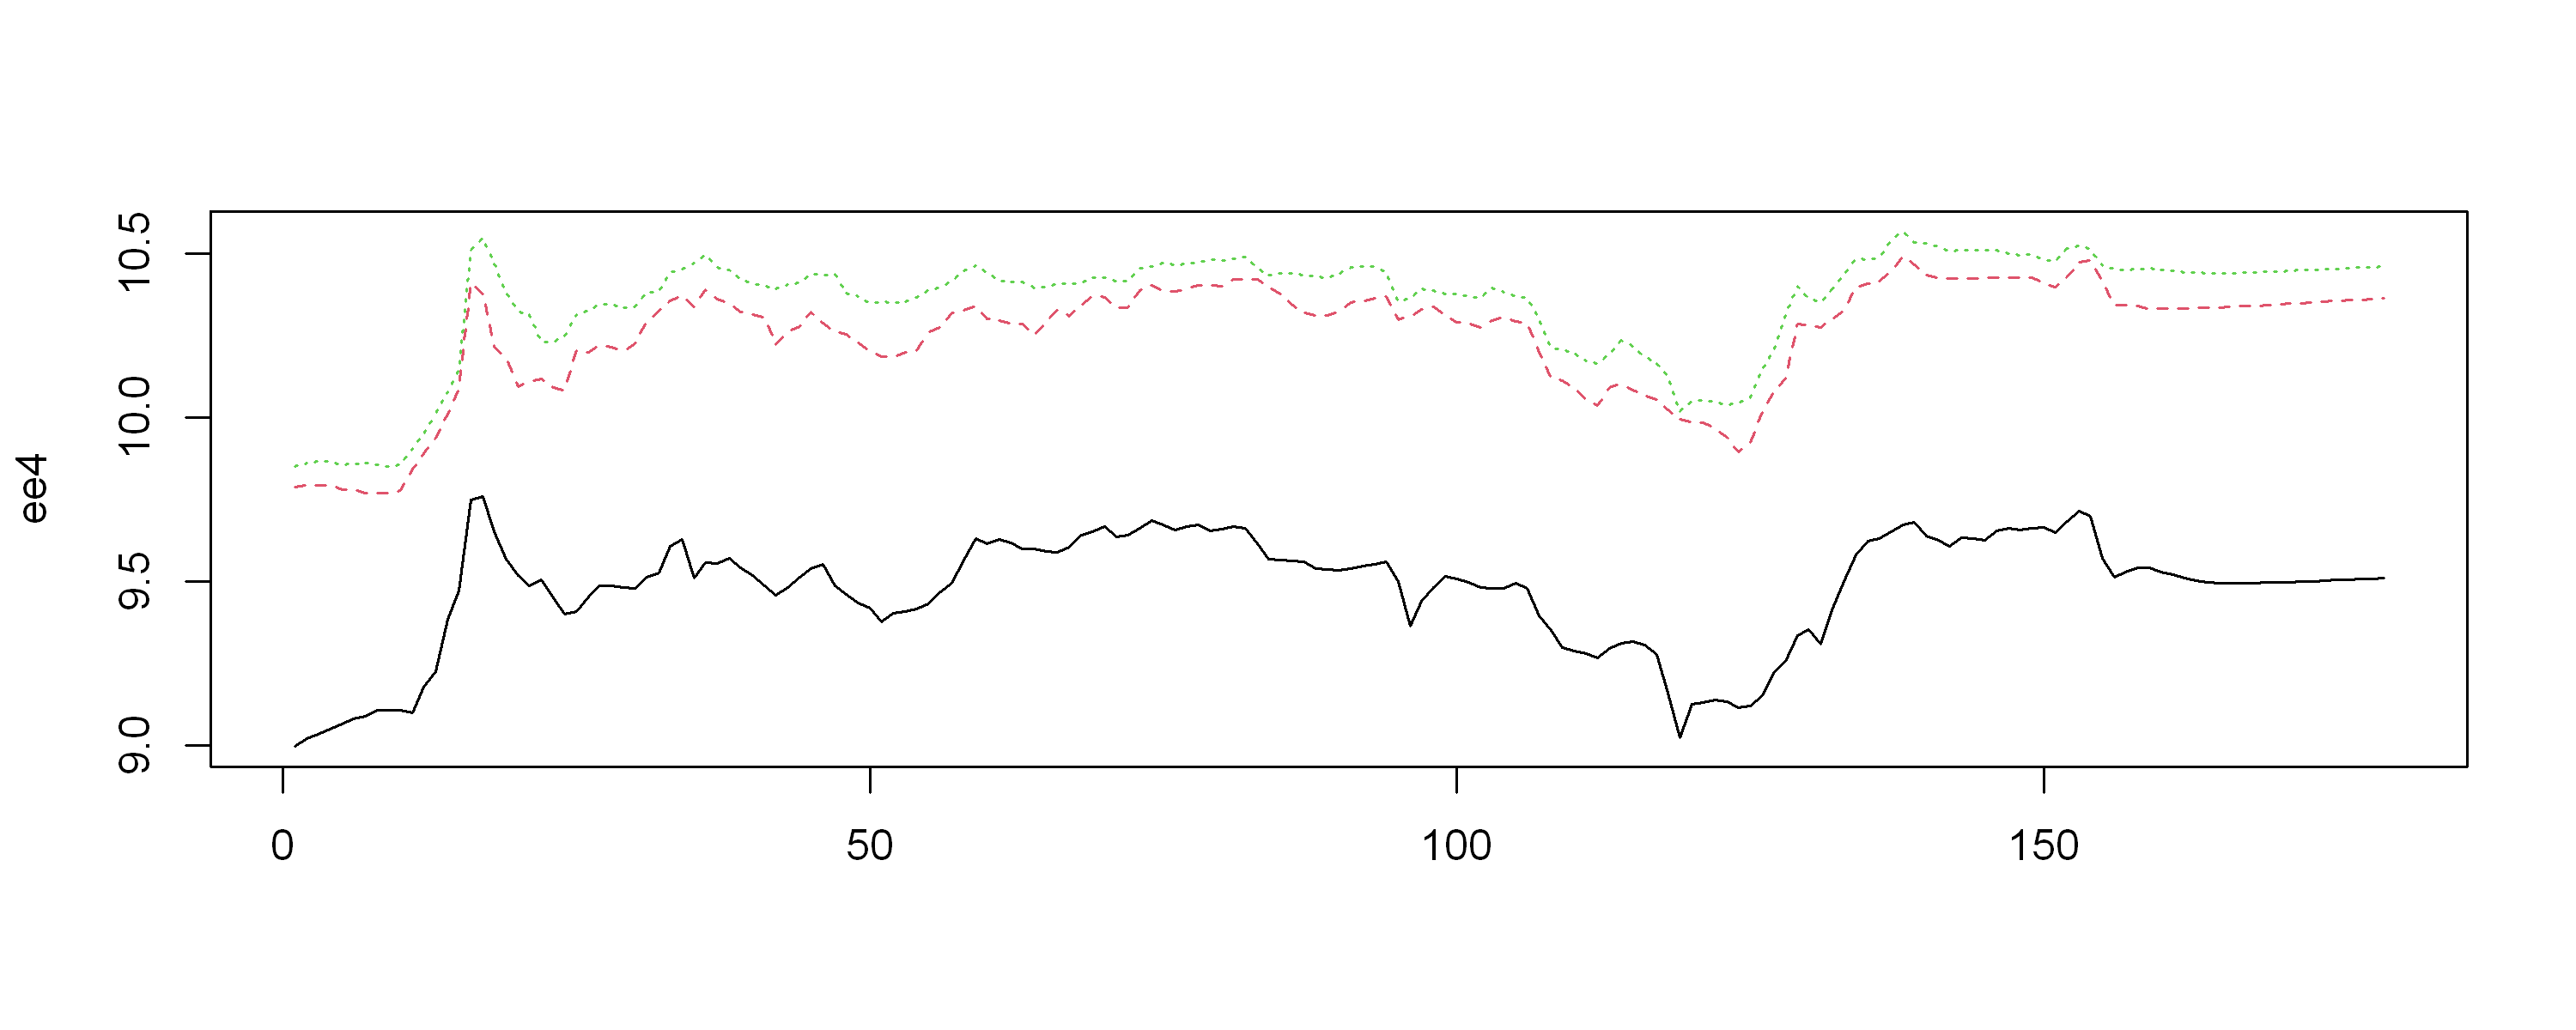

In [179]:
pred_c4 = predict(c4, n.ahead = 20, exoPred = new_exo)
ee4 = rbind(x$endo, pred_c4)
matplot(ee4, type = "l")

In [ ]:
Y_VECM <- VECM(Y, lag = 1, r = 1, include = "const", LRinclude = "none")
summary(Y_VECM)

In [233]:
c4 = VECM(x$endo[, c(1,2,3)], r = 1, lag = 2, 
          estim = "ML", LRinclude = 'none', exogen = exo1)
summary(c4)

Warning message in if (class(x) == "numeric") return(noquote(r)):
"the condition has length > 1 and only the first element will be used"
Warning message in if (class(x) == "matrix") return(matrix(noquote(r), ncol = ncol(x), :
"the condition has length > 1 and only the first element will be used"
Warning message in if (class(x) == "numeric") return(noquote(r)):
"the condition has length > 1 and only the first element will be used"
Warning message in if (class(x) == "matrix") return(matrix(noquote(r), ncol = ncol(x), :
"the condition has length > 1 and only the first element will be used"


#############
###Model VECM 
#############
Full sample size: 159 	End sample size: 156
Number of variables: 3 	Number of estimated slope parameters 27
AIC -3245.082 	BIC -3156.636 	SSR 0.7607266
Cointegrating vector (estimated by ML):
   RHFG_0      RHWS     RHXB
r1      1 -2.200114 1.286284


                ECT                 Intercept           RHFG_0 -1         
Equation RHFG_0 -0.1076(0.0406)**   0.0261(0.0104)*     0.1065(0.1124)    
Equation RHWS   0.0139(0.0408)      -0.0018(0.0104)     0.0629(0.1129)    
Equation RHXB   -0.0501(0.0361)     0.0126(0.0092)      0.0988(0.0998)    
                RHWS -1            RHXB -1            RHFG_0 -2         
Equation RHFG_0 0.1408(0.1550)     0.1574(0.1633)     0.0838(0.1091)    
Equation RHWS   0.0996(0.1557)     0.1437(0.1641)     0.1457(0.1096)    
Equation RHXB   0.1471(0.1377)     0.0079(0.1450)     0.1925(0.0969)*   
                RHWS -2             RHXB -2             exo_1            
Equation RHFG_0 -0.1436(0.1526)     -0.

In [196]:
exo = x$exo[, 'd_foodcrisis']

In [220]:
exo1 = x$exo[,1]
dim(exo1) = c(159,1)

In [213]:
str(x$exo)

 Time-Series [1:159, 1:2] from 2007 to 2020: 0 0 0 0 0 0 0 0 0 0 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:2] "d_foodcrisis" "d_pledge"
